In [7]:
# =============================================================================
#   Imports
# =============================================================================

import numpy as np
import matplotlib.pyplot as plt
import warnings

from matplotlib.animation import FuncAnimation
from matplotlib.collections import LineCollection
from matplotlib.patches import Wedge
from time import time


In [9]:
# =============================================================================
#   Main parameters
# =============================================================================

# Path where the evolution files are loaded (RESEVOL/)
#loading_path = r"/home/thomasvoje/Codes/starevol/RESEVOL/"
loading_path = r"/Users/laura/CALCULS/RESEVOL/"

# Path where the figures are saved
saving_path = r"/Users/laura/CALCULS/starevol/PLOTS/"

# If True, load all the abundances evolution (surface and center)
# If False, load only H1, He4, C12, N14 and O16 (surface and center)
load_abundances = False

# If True, compute a variety of quantities from loaded results
compute_quantities = False

# If True, skip the first 7 lines of the files when loading to skip the header
header = True

# If True, ignore warnings
ignore_warnings = True

# Colors used by default in the code (by default matplotlib's basic colors)
base_colors = ["tab:blue","tab:orange","tab:green","tab:red","tab:purple",
               "tab:brown","tab:pink","tab:gray","tab:olive","tab:cyan"]
base_colormap = "viridis"

# =============================================================================
#   Initialization
# =============================================================================

# Apply header and ignore_warnings
skiprows = 0
if header:
    skiprows = 7
if ignore_warnings:
    warnings.filterwarnings("ignore")

# Defining main tables
folder_names = []
model_names = []
colors = []
labels = []
linestyles = []

# Initializing quantity tables
# -----------------------------------------------------------------------------
# All the quantities loaded by this program are defined here.
# Quantities syntax :
# . *_c means a center quantity
# . *_s means a surface quantity
# . r_* means a quantity in radius coordinates (convective / burning zones
#   locations)
# . *_b means bottom (convective / burning zones locations)
# . *_t means top (convective / burning zones locations)
# . is_* are boolean quantities used for mapping

models, T_eff, dt = [r"model number"],[r"T$_{\rm eff}$ $[K]$"],[r"dt $[yr]$"]
L, t, phases = [r"L $[L_{\odot}]$"],[r"t $[yr]$"],[r"Evolutionary phase"]
mlos, mass = [r"$\dot{M}$ $[M_{\odot}/yr]$"],[r"M $[M_{\odot}]$"]
nb_shell, cpu_time = [r"Number of shells"],[r"CPU time $[s]$"]
nb_iter, crash = [r"Number of iterations"],[r"Number of crashes"]
g_eff = [r"g$_{\rm eff}$ $[cgs]$"]
R_eff, rho_eff = [r"R$_{\rm eff}$ $[R_{\odot}]$"],[r"$\rho_{eff}$ $[cgs]$"]
T_c, rho_c = [r"T$_{\rm c}$ $[K]$"],[r"$\rho_{c}$ $[cgs]$"]
P_c, T_max = [r"P$_{\rm c}$ $[cgs]$"],[r"T$_{\rm max}$ $[K]$"]
mass_T_max = [r"M(T$_{\rm max}$) $[M_{\odot}]$"]
rho_max = [r"$\rho_{\rm max}$ $[cgs]$"]
beta_c, eta_c, degpec = [r"$\beta_c$"],[r"$\eta_c$"],[r"Electronic degeneracy"]
E_nupla_c = [r"E$_{\rm \nu,c}$ $[cgs]$"]
E_nucl_c = [r"E$_{\rm nucl,c}$ $[cgs]$"]
E_grav_c = [r"E$_{\rm grav,c}$ $[cgs]$"]
L_H = [r"L$_{\rm H}$ $[L_{\odot}]$"]
L_He = [r"L$_{\rm He}$ $[L_{\odot}]$"]
L_C = [r"L$_{\rm C}$ $[L_{\odot}]$"]
L_Ne = [r"L$_{\rm Ne}$ $[L_{\odot}]$"]
L_O = [r"L$_{\rm O}$ $[L_{\odot}]$"]
L_Si = [r"L$_{\rm Si}$ $[L_{\odot}]$"]
L_nupla = [r"L$_{\rm \nu}$ $[L_{\odot}]$"]
L_nucl = [r"L$_{\rm nucl}$ $[L_{\odot}]$"]
L_grav = [r"L$_{\rm grav}$ $[L_{\odot}]$"]
maccr = [r"$\dot{M}_{acc}$ $[M_{\odot}/yr]$"]
L_shear, Rossby = [r"L$_{\rm shear}$ $[L_{\odot}]$"],[r"Rossby number"]
omega_s, v_s = [r"$\Omega_{s}$ $[cgs]$"],[r"v$_{\rm s}$ $[cgs]$"]
H_burning_zone_b, H_burning_zone_t = [r"H burning"],[r"H burning"]
He_burning_zone_b, He_burning_zone_t = [r"He burning"],[r"He burning"]
C_burning_zone_b, C_burning_zone_t = [r"C burning"],[r"C burning"]
Ne_burning_zone_b, Ne_burning_zone_t = [r"Ne burning"],[r"Ne burning"]
conv_zone_1_b, conv_zone_1_t = [r"Convective core"],[r"Convective core"]
conv_zone_2_b, conv_zone_2_t = [r"Convective zone"],[r"Convective zone"]
conv_zone_3_b, conv_zone_3_t = [r"Convective zone"],[r"Convective zone"]
conv_zone_4_b, conv_zone_4_t = [r"Convective zone"],[r"Convective zone"]
conv_zone_5_b, conv_zone_5_t = [r"Convective zone"],[r"Convective zone"]
thermohaline_conv_zone_b = [r"Thermohaline convective zone"]
thermohaline_conv_zone_t = [r"Thermohaline convective zone"]
conv_envelope_b = [r"Convective envelope"]
r_H_burning_zone_b, r_H_burning_zone_t = [r"H burning"],[r"H burning"]
r_He_burning_zone_b, r_He_burning_zone_t = [r"He burning"],[r"He burning"]
r_C_burning_zone_b, r_C_burning_zone_t = [r"C burning"],[r"C burning"]
r_Ne_burning_zone_b, r_Ne_burning_zone_t = [r"Ne burning"],[r"Ne burning"]
r_conv_zone_1_b, r_conv_zone_1_t = [r"Convective core"],[r"Convective core"]
r_conv_zone_2_b, r_conv_zone_2_t = [r"Convective zone"],[r"Convective zone"]
r_conv_zone_3_b, r_conv_zone_3_t = [r"Convective zone"],[r"Convective zone"]
r_conv_zone_4_b, r_conv_zone_4_t = [r"Convective zone"],[r"Convective zone"]
r_conv_zone_5_b, r_conv_zone_5_t = [r"Convective zone"],[r"Convective zone"]
r_thermohaline_conv_zone_b = [r"Thermohaline convective zone"]
r_thermohaline_conv_zone_t = [r"Thermohaline convective zone"]
r_conv_envelope_b = [r"Convective envelope"]
H1_c, He4_c = [r"$^{1}$H"],[r"$^{4}$He"]
C12_c, N14_c, O16_c = [r"$^{12}$C"],[r"$^{14}$N"],[r"$^{16}$O"]
H1_s, He4_s = [r"$^{1}$H"],[r"$^{4}$He"]
C12_s, N14_s, O16_s = [r"$^{12}$C"],[r"$^{14}$N"],[r"$^{16}$O"]

# If load_abundances is True
H2_c, He3_c = [r"$^{2}$H"],[r"$^{3}$He"]
Li6_c, Li7_c = [r"$^{6}$Li"],[r"$^{7}$Li"]
Be7_c, B8_c, Be9_c = [r"$^{7}$Be"],[r"$^{8}$B"],[r"$^{9}$Be"]
B10_c, B11_c = [r"$^{10}$B"],[r"$^{11}$B"]
C13_c, N13_c, C14_c = [r"$^{13}$C"],[r"$^{13}$N"],[r"$^{14}$C"]
N15_c, O15_c = [r"$^{15}$N"],[r"$^{15}$O"]
O17_c, O18_c = [r"$^{17}$O"],[r"$^{18}$O"]
F18_c, F19_c, F20_c = [r"$^{18}$F"],[r"$^{19}$F"],[r"$^{20}$F"]
Ne20_c, Ne21_c, Ne22_c = [r"$^{20}$Ne"],[r"$^{21}$Ne"],[r"$^{22}$Ne"]
Na22_c, Ne23_c, Na23_c = [r"$^{22}$Na"],[r"$^{23}$Ne"],[r"$^{23}$Na"]
Na24_c, Mg24_c, Na25_c = [r"$^{24}$Na"],[r"$^{24}$Mg"],[r"$^{25}$Na"]
Mg25_c, Mg26_c, Al26m_c = [r"$^{25}$Mg"],[r"$^{26}$Mg"],[r"$^{26m}$Al"]
Al26g_c, Mg27_c, Al27_c = [r"$^{26g}$Al"],[r"$^{27}$Mg"],[r"$^{27}$Al"]
Si28_c, Si29_c, Si30_c = [r"$^{28}$Si"],[r"$^{29}$Si"],[r"$^{30}$Si"]
P31_c, S32_c, S33_c = [r"$^{31}$P"],[r"$^{32}$S"],[r"$^{33}$S"]
S34_c, S35_c, Cl35_c = [r"$^{34}$S"],[r"$^{35}$S"],[r"$^{35}$Cl"]
S36_c, Cl36_c, Cl37_c = [r"$^{36}$S"],[r"$^{36}$Cl"],[r"$^{37}$Cl"]
neutron_c, heavy_c = [r"$^{1}$n"],[r"heavy"]
metallicity_c = [r"metallicity"]
H2_s, He3_s = [r"$^{2}$H"],[r"$^{3}$He"]
Li6_s, Li7_s = [r"$^{6}$Li"],[r"$^{7}$Li"]
Be7_s, B8_s, Be9_s = [r"$^{7}$Be"],[r"$^{8}$B"],[r"$^{9}$Be"]
B10_s, B11_s = [r"$^{10}$B"],[r"$^{11}$B"]
C13_s, N13_s, C14_s = [r"$^{13}$C"],[r"$^{13}$N"],[r"$^{14}$C"]
N15_s, O15_s = [r"$^{15}$N"],[r"$^{15}$O"]
O17_s, O18_s = [r"$^{17}$O"],[r"$^{18}$O"]
F18_s, F19_s, F20_s = [r"$^{18}$F"],[r"$^{19}$F"],[r"$^{20}$F"]
Ne20_s, Ne21_s, Ne22_s = [r"$^{20}$Ne"],[r"$^{21}$Ne"],[r"$^{22}$Ne"]
Na22_s, Ne23_s, Na23_s = [r"$^{22}$Na"],[r"$^{23}$Ne"],[r"$^{23}$Na"]
Na24_s, Mg24_s, Na25_s = [r"$^{24}$Na"],[r"$^{24}$Mg"],[r"$^{25}$Na"]
Mg25_s, Mg26_s, Al26m_s = [r"$^{25}$Mg"],[r"$^{26}$Mg"],[r"$^{26m}$Al"]
Al26g_s, Mg27_s, Al27_s = [r"$^{26g}$Al"],[r"$^{27}$Mg"],[r"$^{27}$Al"]
Si28_s, Si29_s, Si30_s = [r"$^{28}$Si"],[r"$^{29}$Si"],[r"$^{30}$Si"]
P31_s, S32_s, S33_s = [r"$^{31}$P"],[r"$^{32}$S"],[r"$^{33}$S"]
S34_s, S35_s, Cl35_s = [r"$^{34}$S"],[r"$^{35}$S"],[r"$^{35}$Cl"]
S36_s, Cl36_s, Cl37_s = [r"$^{36}$S"],[r"$^{36}$Cl"],[r"$^{37}$Cl"]
neutron_s, heavy_s = [r"$^{1}$n"],[r"heavy"]
metallicity_s = [r"metallicity"]

# If compute_quantities is True
cumulative_cpu_time = [r"Total CPU time $[h]$"]
total_mlos = [r"$\Delta$M $[M_{\odot}]$"]
nb_cz = [r"number of convective zones"]
is_MS = [r"is a main sequence star"]
is_WR = [r"is a Wolf-Rayet star"]

# -----------------------------------------------------------------------------

# Not a quantity
spectral_type = [r"spectral type"]
spectral_type_linestyles = []

# =============================================================================
#   Console display and input
# =============================================================================

print(__doc__)
print(" loading results in ..", loading_path)
print(" saving figures in ...", saving_path)
try:
    N = input("\n Number of STAREVOL results to load : ")
    if N == "all":
        load_all_models = True
        N = 1
        #print(N)
    else:
        load_all_models = False
        N = int(N)
except:
    N = 0
    print("\n The number of STAREVOL results to load must be an integer.")
for n in range(N):
    folder_name_tmp = input(f"\n folder name {n+1} : ")
    #print(folder_name_tmp)
    model_name_tmp = input(f" model name {n+1}  : ")
    #print(model_name_tmp)
    folder_names.append(folder_name_tmp)
    model_names.append(model_name_tmp)

# YOU CAN ALSO LOAD FILES BY ADDING A folder_names LIST AND A model_names LIST 
# BELOW THEN RUNNING THE PROGRAM WITH N = 0.
# -----------------------------------------------------------------------------

# -----------------------------------------------------------------------------

N = len(folder_names)
print(N)

# =============================================================================
#   Definition of plotting functions
# =============================================================================

def plot(x, y, fig=None, ax=None, output=False, domain=None, figsize=None,
         invert_xaxis=False, invert_yaxis=False, xlabel=None, ylabel=None,
         log_xaxis=False, log_yaxis=False, save_fig=False, save_name=None,
         mapping=None, cmap=base_colormap, log_mapping=False, cbarlabel=None,
         cbar_min=None, cbar_max=None, title=None):

    ''' 
    Main plotting function. Plot y as a function of x. Allows mapping (ie. 
    coloring the plot according to the value of a specified quantity).
    
    Parameters 
    ----------
    
    x, y : lists of ndarray
        Quantities to be plotted. 

    fig, ax : Figure and Axes [None]
        If specified, modify the figure given as an entry.

    output : bool [False]
        If True, returns the figure and axes.

    domain : list, ndarray or tuple [None]
        If specified, form needed is (xmin,xmax,ymin,ymax). Plot using the 
        values in domain as axis limits.
        
    figsize : tuple [None]
        If specified, size of the figure.
        
    invert_xaxis : bool [False]
        If True, invert the x-axis.
        
    invert_yaxis : bool [False]
        If True, invert the y-axis.
        
    xlabel : str [None]
        If specified, label of the x-axis.
        
    ylabel : str [None]
        If specified, label of the y-axis.
        
    log_xaxis : bool [False]
        If True, plot with log(x) instead of x.
        
    log_yaxis : bool [False]
        If True, plot with log(y) instead of y.
        
    save_fig : bool [False]
        If True, save the figure in the saving_path folder.
        
    save_name : str [None]
        If specified, name under which the figure is saved.
        
    mapping : list of ndarray [None]
        If specified, quantity according to which the plot is colored.
        
    cmap : str [base_colormap]
        Name of the colormap.
        
    log_mapping : bool [False]
        If True, plot with log(mapping) instead of mapping.
        
    cbarlabel : str [None]
        If specified, label of the colormap.
        
    cbar_min : float [None]
        If specified, minimum value for the colorbar.
        
    cbar_max : float [None]
        If specified, maximum value for the colorbar.
        
    title : str [None]
        If specified, title of the figure.
        
    Returns
    -------
    
    fig, ax : Figure and Axes (returned only is output = True).
    '''

    # Initializing the figure and axes
    if fig is None or ax is None:
        if figsize is None:
            fig, ax = plt.subplots(figsize=(10,7))
        else:
            fig, ax = plt.subplots(figsize=figsize)

    # Main loop for plotting the data
    for n in range(N):

        # Plotting data or their logarithm (if specified)
        X = x[n]
        Y = y[n]

        # Plotting an other quantity as the colormap of the plot (if specified)
        if mapping is None:
            linestyle = linestyles[n]
            if (linestyle=='solid' or linestyle=='dashed' or linestyle=='-' 
                or linestyle=='--' or linestyle=='-.'  or linestyle=='dotted'
                or linestyle=='dashdot' or linestyle=='--' or linestyle==':'
                or linestyle==' '):
                ax.plot(X, Y, ls=linestyle, color=colors[n], label=labels[n])
            else:
                ax.plot(X, Y, marker=linestyle, color=colors[n], 
                        label=labels[n])
        else:
            # See :
            # https://matplotlib.org/stable/gallery/lines_bars_and_
            # markers/multicolored_line.html
            points = np.array([X, Y]).T.reshape(-1, 1, 2)
            segments = np.concatenate([points[:-1], points[1:]], axis=1)
            mapp = mapping[n]
            if log_mapping:
                mapp = np.log10(mapping[n])
            if cbar_min is None or cbar_max is None:
                mappmin, mappmax = np.nanmin(mapp), np.nanmax(mapp)
            else:
                mappmin, mappmax = cbar_min, cbar_max
            norm = plt.Normalize(mappmin, mappmax)
            if mapping is spectral_type:
                lc = LineCollection(segments, cmap=cmap, norm=norm,
                                    linestyles=spectral_type_linestyles[n])
            else:
                lc = LineCollection(segments, cmap=cmap, norm=norm)
            lc.set_array(mapp)
            line = ax.add_collection(lc)
            ax.plot(X[-1], Y[-1], color="k", 
                    label=labels[n])

    # Colorbar of the mapping (if specified)
    if mapping is not None:
        cbar = fig.colorbar(line, ax=ax)
        if cbarlabel is None:
            cbar.set_label(label=mapping[-1], size=14)
        else:
            cbar.set_label(label=cbarlabel, size=14)

    # Computing the axis limits (if unspecified)
    if domain is None:
        xmin = x[0][0]
        if log_xaxis:
            xmin = np.log10(x[0][0])
        for n in range(N):
            X = np.nanmin(x[n])
            if log_xaxis:
                X = np.log10(np.nanmin(x[n]))
            if xmin>X:
                xmin = X
        xmax = x[0][0]
        if log_xaxis:
            xmax = np.log10(x[0][0])
        for n in range(N):
            X = np.nanmax(x[n])
            if log_xaxis:
                X = np.log10(np.nanmax(x[n]))
            if xmax<X:
                xmax = X
        ymin = y[0][0]
        if log_yaxis:
            ymin = np.log10(y[0][0])
        for n in range(N):
            Y = np.nanmin(y[n])
            if log_yaxis:
                Y = np.log10(np.nanmin(y[n]))
            if ymin>Y:
                ymin = Y
        ymax = y[0][0]
        if log_yaxis:
            ymax = np.log10(y[0][0])
        for n in range(N):
            Y = np.nanmax(y[n])
            if log_yaxis:
                Y = np.log10(np.nanmax(y[n]))
            if ymax<Y:
                ymax = Y
        width_factor = 0.1*abs(xmax-xmin)
        height_factor = 0.1*abs(ymax-ymin)
        xmin = xmin - width_factor
        xmax = xmax + width_factor
        ymin = ymin - height_factor
        ymax = ymax + height_factor
        if log_xaxis:
            xmin, xmax = 10**xmin, 10**xmax
        if log_yaxis:
            ymin, ymax = 10**ymin, 10**ymax
        domain = (xmin,xmax,ymin,ymax)

    # Setting the axis limits
    ax.axis(domain)

    # Inverting axis (if specified)
    if invert_xaxis:
        ax.invert_xaxis()
    if invert_yaxis:
        ax.invert_yaxis()

    # Logarithmic scale (if specified)
    if log_xaxis:
        ax.set_xscale("log")
    if log_yaxis:
        ax.set_yscale("log")

    # Adding labels to axes (if specified)
    if xlabel is None:
        ax.set_xlabel(x[-1], fontsize=14)
    else:
        ax.set_xlabel(xlabel, fontsize=14)
    if ylabel is None:
        ax.set_ylabel(y[-1], fontsize=14)
    else:
        ax.set_ylabel(ylabel, fontsize=14)

    if title is not None:
        ax.set_title(title, y=1.02, fontsize=15)
        
    # Adding legend and ticks and displaying the figure
    i = 0
    for label in labels:
        if label is None:
            i+=1
    if i!=N:
        ax.legend()
    ax.tick_params(axis='both', labelsize=12)
    fig.tight_layout()
    fig.show()
    
    if x is phases or y is phases or mapping is phases:
        print("\n Evolutionary phases")
        print(" 1 : Pre-Main Sequence")
        print(" 2 : Main Sequence (H-core burning)")
        print(" 3 : H-shell burning")
        print(" 4 : He-core burning")
        print(" 5 : He and H-shell burning")
        print(" 6 : C-core burning")
        print(" 7 : Ne-core burning")
        print(" 8 : O-core burning")

    # Saving figure (if specified)
    if save_fig:
        print("\n Saving plot.")
        if save_name is None:
            fig.savefig(saving_path+"plot_evolution_starevol.png", dpi=200)
        else:
            fig.savefig(saving_path+save_name, dpi=200)
            
    # Returning the figure and axis (if specified)
    if output:
        return fig, ax

# =============================================================================

def multiplot(x, y, n=1, fig=None, ax=None, figsize=None, domain=None,
              invert_xaxis=False, invert_yaxis=False, xlabel=None,
              log_xaxis=False, log_yaxis=False, colors=None, output=False,
              save_fig=False, save_name=None, title=None):
    
    '''
    Multiple plotting function. Plot each quantity in the list y as a function
    of x for the selected loaded STAREVOL result.
    
    Parameters
    ----------
    
    n : int [1]
        Number of the result plotted.
    
    The rest is identical to plot() except that y is a list of quantities
    instead of a quantity.
    
    Returns
    -------
    
    Identical to plot().
    '''
    
    n = n-1
    
    # Initializing the figure and axes
    if fig is None or ax is None:
        if figsize is None:
            fig, ax = plt.subplots(figsize=(10,7))
        else:
            fig, ax = plt.subplots(figsize=figsize)
            
    if colors is None:
        colors = base_colors
    X = x[n]
    for i in range(len(y)):
        Y = y[i][n]
        linestyle = linestyles[n]
        if (linestyle=='solid' or linestyle=='dashed' or linestyle=='-' 
            or linestyle=='--' or linestyle=='-.'  or linestyle=='dotted'
            or linestyle=='dashdot' or linestyle=='--' or linestyle==':'
            or linestyle==' '):
            ax.plot(X, Y, ls=linestyle, color=colors[i%len(colors)],
                    label=y[i][-1])
        else:
            ax.plot(X, Y, marker=linestyle,
                    color=colors[i%len(colors)])
            
    # Computing the axis limits (if unspecified)
    if domain is None:
        xmin = np.nanmin(x[n])
        if log_xaxis:
            xmin = np.log10(np.nanmin(x[n]))
        xmax = np.nanmax(x[n])
        if log_xaxis:
            xmax = np.log10(np.nanmax(x[n]))
        ymin = y[0][n][0]
        if log_yaxis:
            ymin = np.log10(y[0][n][0])
        for i in range(len(y)):
            Y = np.nanmin(y[i][n])
            if log_yaxis:
                Y = np.log10(np.nanmin(y[i][n]))
            if ymin>Y:
                ymin = Y
        ymax = y[0][n][0]
        if log_yaxis:
            ymax = np.log10(y[0][n][0])
        for i in range(len(y)):
            Y = np.nanmax(y[i][n])
            if log_yaxis:
                Y = np.log10(np.nanmax(y[i][n]))
            if ymax<Y:
                ymax = Y
        width_factor = 0.1*abs(xmax-xmin)
        height_factor = 0.1*abs(ymax-ymin)
        xmin = xmin - width_factor
        xmax = xmax + width_factor
        ymin = ymin - height_factor
        ymax = ymax + height_factor
        if log_xaxis:
            xmin, xmax = 10**xmin, 10**xmax
        if log_yaxis:
            ymin, ymax = 10**ymin, 10**ymax
        domain = (xmin,xmax,ymin,ymax)

    # Setting the axis limits
    ax.axis(domain)
    
    # Inverting axis (if specified)
    if invert_xaxis:
        ax.invert_xaxis()
    if invert_yaxis:
        ax.invert_yaxis()

    # Logarithmic scale (if specified)
    if log_xaxis:
        ax.set_xscale("log")
    if log_yaxis:
        ax.set_yscale("log")

    # Adding labels to axes (if specified)
    if xlabel is None:
        ax.set_xlabel(x[-1], fontsize=14)
    else:
        ax.set_xlabel(xlabel, fontsize=14)

    if title is not None:
        ax.set_title(title, y=1.02, fontsize=15)
        
    # Adding legend and ticks and displaying the figure
    ax.legend(fontsize=12)
    ax.tick_params(axis='both', labelsize=12)
    fig.tight_layout()
    fig.show()
    
    # Saving figure (if specified)
    if save_fig:
        print("\n Saving plot.")
        if save_name is None:
            fig.savefig(saving_path+"plot_evolution_starevol.png", dpi=200)
        else:
            fig.savefig(saving_path+save_name, dpi=200)
            
    # Returning the figure and axis (if specified)
    if output:
        return fig, ax

# =============================================================================

def hrd(mode="log_log", humphreys_davidson=False, radiuses=False, ZAMS=False,
        output=False, domain=None, figsize=None, title=None,
        cmap=base_colormap, mapping=None, cbarlabel=None, log_mapping=False,
        cbar_min=None, cbar_max=None, save_fig=False, save_name=None):
    
    '''
    Plot an Hertzsprung-Russell diagram. 
    
    Parameters
    ----------
    
    mode : str ["log_log"]
        "log_log" : plot log10(L) as a function of log10(T_eff).
        "lin_log" : plot log10(L) as a function of T_eff.
        "logscale_logscale" : plot L as a function of T_eff (both on a
                              logarithmic scale).
        "lin_logscale" : plot L (on a logarithmic scale) as a function of
                         T_eff.
    
    humphreys_davidson : bool [False]
        If True, plot the Humphreys-Davidson limit.
    
    radiuses : bool [False]
        If True, plot the lines of iso-radiuses for 0.01, 0.1, 1, 10, 100,
        1000 and 10000 solar radiuses.
        
    ZAMS : bool [False]
        If True, plot the position of the ZAMS for each model.
    
    The rest is identical to plot().
    
    Returns
    -------
    
    Identical to plot().
    '''
    
    # Calling the plot function according to the version
    if mode == "log_log":
        fig, ax = plot(log10(T_eff), log10(L), output=True, invert_xaxis=True, 
                       domain=domain, cmap=cmap, mapping=mapping,
                       cbarlabel=cbarlabel, figsize=figsize, title=title,
                       log_mapping=log_mapping, save_fig=save_fig,
                       save_name=save_name, cbar_min=cbar_min,
                       cbar_max=cbar_max)
        
        # Plot lines of same radiuses (0.01,0.1,1,10,100,1000,10000 Rsun)
        if radiuses:
            xmin, xmax = ax.get_xlim()
            ymin, ymax = ax.get_ylim()
            log_C = np.log10(4*np.pi*5.670374e-8/(3.83e26)*(6.9634e8)**2)
            log_R_list = np.log10([1e-2,1e-1,1e0,1e1,1e2,1e3,1e4])
            log_Teff = np.linspace(2, 6, 1000)
            for log_R in log_R_list:
                log_L = log_C + 2*log_R + 4*log_Teff
                for i in range(len(log_L)):
                    if log_L[i]>ymin:
                        if log_R>=0:
                            ax.text(log_Teff[i]+0.005*(xmax-xmin),
                                    ymin+0.005*(ymax-ymin),
                                    "{:.0f}".format(10**log_R)+r"R$_{\odot}$")
                        elif log_R==-1:
                            ax.text(log_Teff[i]+0.005*(xmax-xmin),
                                    ymin+0.005*(ymax-ymin),
                                    "{:.1f}".format(10**log_R)+r"R$_{\odot}$")
                        elif log_R==-2:
                            ax.text(log_Teff[i]+0.005*(xmax-xmin),
                                    ymin+0.005*(ymax-ymin),
                                    "{:.2f}".format(10**log_R)+r"R$_{\odot}$")
                        break
                ax.plot(log_Teff, log_L, color="k", ls="--", lw=0.7, zorder=1)
        
        if ZAMS:
            ZAMS_Teff_list, ZAMS_L_list = [],[]
            for n in range(N):
                for i in range(len(H1_c[n])):
                    if H1_c[n][i]<H1_c[n][0]*0.999:
                        break
                ZAMS_Teff_list.append(T_eff[n][i])
                ZAMS_L_list.append(L[n][i])
            ZAMS_Teff_list = np.array(ZAMS_Teff_list)
            ZAMS_L_list = np.array(ZAMS_L_list)
            ax.plot(np.log10(ZAMS_Teff_list), np.log10(ZAMS_L_list), color="k",
                    marker="o", lw=0.7, zorder=1)
        
    elif mode == "lin_log":
        fig, ax = plot(T_eff, log10(L), output=True, invert_xaxis=True,  
                       domain=domain, cmap=cmap, mapping=mapping,
                       cbarlabel=cbarlabel, figsize=figsize, title=title,
                       log_mapping=log_mapping, save_fig=save_fig,
                       save_name=save_name, cbar_min=cbar_min,
                       cbar_max=cbar_max)
    
    elif mode == "logscale_logscale":
        fig, ax = plot(T_eff, L, output=True, invert_xaxis=True,
                       log_xaxis=True, log_yaxis=True, 
                       domain=domain, cmap=cmap, mapping=mapping,
                       cbarlabel=cbarlabel, figsize=figsize, title=title,
                       log_mapping=log_mapping, save_fig=save_fig,
                       save_name=save_name, cbar_min=cbar_min,
                       cbar_max=cbar_max)
    
    elif mode == "lin_logscale":
        fig, ax = plot(T_eff, L, output=True, invert_xaxis=True,
                       log_yaxis=True, domain=domain, cmap=cmap,
                       mapping=mapping, cbarlabel=cbarlabel, figsize=figsize, 
                       title=title, log_mapping=log_mapping, save_fig=save_fig,
                       save_name=save_name, cbar_min=cbar_min,
                       cbar_max=cbar_max)
    
    else:
        print("\n Error in hrd, mode should be one of the following :")
        print(" 'log_log', 'lin_log', 'logscale_logscale' or 'lin_logscale'.")
    
    # Plot the Humphreys-Davidson limit
    if humphreys_davidson:
        T_eff_HD = np.linspace(50000, 100, 100000)
        L_HD = np.zeros_like(T_eff_HD)
        for i in range(len(T_eff_HD)):
            if np.log10(T_eff_HD[i])>3.8:
                L_HD[i] = 0.9289*np.log10(T_eff_HD[i])+5.8-0.9286*3.8
            else :
                L_HD[i] = 5.8
        L_HD = 10**L_HD
        if mode == "log_log":
            ax.plot(np.log10(T_eff_HD), np.log10(L_HD), lw=0.7, ls="--",
                    color="gray", zorder=1)
        elif mode == "lin_log":
            ax.plot(T_eff_HD, np.log10(L_HD), lw=0.7, ls="--", color="gray", 
                    zorder=1)
        elif mode == "logscale_logscale" or mode == "lin_logscale":
            ax.plot(T_eff_HD, L_HD, lw=0.7, ls="--", color="gray", 
                    zorder=1)
        
    # Returning the figure and axis (if specified)
    if output:
        return fig, ax

# =============================================================================

def shrd(output=False, domain=None, cmap=base_colormap, mapping=None, 
        cbarlabel=None, figsize=None, log_mapping=False,
        Castro_et_al_2014=False, save_fig=False, save_name=None):
    
    ''' 
    Plot a spectroscopic Hertzsprung-Russell diagram.
    See Langer & Kudritzki (2014,A&A,564,A52).
    
    Parameters
    ----------
    
    Identical to plot().
    
    Returns
    -------
    
    Identical to plot().
    '''
    
    log_modif_L = [r"log($\mathcal{L}$) $[\mathcal{L}_{\odot}]$"]
    for n in range(N):
        log_modif_L.insert(-1, 4*np.log10(T_eff[n])-np.log10(g_eff[n])-10.6082)
    
    # Calling the plot function
    fig, ax = plot(log10(T_eff), log_modif_L, output=True, invert_xaxis=True, 
                   domain=domain, cmap=cmap, mapping=mapping,
                   cbarlabel=cbarlabel, figsize=figsize,
                   log_mapping=log_mapping, save_fig=save_fig,
                   save_name=save_name)
        
    if Castro_et_al_2014:
        y_castro_ZAMS = np.linspace(2.62,4.19,10000)
        y_castro_TAMS = np.linspace(2.84,3.88,10000)
        y_castro_UPPER = np.linspace(4.13,4.48,10000)
        x_castro_ZAMS = -0.08*y_castro_ZAMS**2 + 0.743*y_castro_ZAMS + 2.973
        x_castro_TAMS = -0.144*y_castro_TAMS**2 + 0.982*y_castro_TAMS + 2.618
        x_castro_UPPER = -3.552*y_castro_UPPER**2 + 31.938*y_castro_UPPER \
            - 67.323
        ax.plot(x_castro_ZAMS, y_castro_ZAMS, ls="--", color="k", zorder=1.)
        ax.plot(x_castro_TAMS, y_castro_TAMS, ls="--", color="k", zorder=1.)
        ax.plot(x_castro_UPPER, y_castro_UPPER, ls="--", color="k", zorder=1.)
    
    # Returning the figure and axis (if specified)
    if output:
        return fig, ax

# =============================================================================

def kiel(output=False, domain=None, cmap=base_colormap, mapping=None, 
         cbarlabel=None, figsize=None, log_mapping=False, 
         save_fig=False, save_name=None):

    ''' 
    Plot a Kiel diagram. 
    
    Parameters
    ----------
    
    Identical to plot().
    
    Returns
    -------
    
    Identical to plot().
    '''
    
    # Calling the plot function
    fig, ax = plot(log10(T_eff), log10(g_eff), output=True, 
                   invert_xaxis=True, invert_yaxis=True, 
                   domain=domain, figsize=figsize,
                   cmap=cmap, mapping=mapping, cbarlabel=cbarlabel,
                   log_mapping=log_mapping, save_fig=save_fig,
                   save_name=save_name)
    
    # Returning the figure and axis (if specified)
    if output:
        return fig, ax

# =============================================================================

def central_rho_T(output=False, domain=None, cmap=base_colormap, mapping=None, 
                  cbarlabel=None, figsize=None, log_mapping=False, 
                  save_fig=False, save_name=None):

    ''' 
    Plot a central temperature / density diagram. 
    
    Parameters
    ----------
    
    Identical to plot().
    
    Returns
    -------
    
    Identical to plot().
    '''
    
    # Calling the plot function
    fig, ax = plot(log10(rho_c), log10(T_c), output=True, 
                   domain=domain, figsize=figsize, 
                   cmap=cmap, mapping=mapping, cbarlabel=cbarlabel,
                   log_mapping=log_mapping, save_fig=save_fig,
                   save_name=save_name)
    
    # Returning the figure and axis (if specified)
    if output:
        return fig, ax

# =============================================================================

def teff_evol(output=False, domain=None, cmap=base_colormap, mapping=None, 
              cbarlabel=None, figsize=None, log_mapping=False, 
              save_fig=False, save_name=None):

    '''
    Plot an effective temperature / age diagram.
    
    Parameters
    ----------
    
    Identical to plot().
    
    Returns
    -------
    
    Identical to plot().
    '''
    
    # Calling the plot function
    fig, ax = plot(t, log10(T_eff), output=True, figsize=figsize,
                   domain=domain, cmap=cmap, mapping=mapping,
                   cbarlabel=cbarlabel, log_mapping=log_mapping,
                   save_fig=save_fig, save_name=save_name)
    # Returning the figure and axis (if specified)
    if output:
        return fig, ax

# =============================================================================

def mass_evol(output=False, domain=None, cmap=base_colormap, mapping=None, 
              cbarlabel=None, figsize=None, log_mapping=False, 
              save_fig=False, save_name=None):

    '''
    Plot a mass / age diagram.
    
    Parameters
    ----------
    
    Identical to plot().
    
    Returns
    -------
    
    Identical to plot().
    '''
    
    # Calling the plot function
    fig, ax = plot(t, mass, output=True, domain=domain, figsize=figsize,
                   cmap=cmap, mapping=mapping, cbarlabel=cbarlabel,
                   log_mapping=log_mapping, save_fig=save_fig,
                   save_name=save_name)
    
    # Returning the figure and axis (if specified)
    if output:
        return fig, ax
    
# =============================================================================

def mass_teff(output=False, domain=None, cmap=base_colormap, mapping=None, 
              cbarlabel=None, figsize=None, log_mapping=False, 
              save_fig=False, save_name=None):

    '''
    Plot a mass / effective temperature diagram.
    
    Parameters
    ----------
    
    Identical to plot().
    
    Returns
    -------
    
    Identical to plot().
    '''
    
    # Calling the plot function
    fig, ax = plot(log10(T_eff), mass, output=True, invert_xaxis=True, 
                   domain=domain, cmap=cmap, mapping=mapping,
                   cbarlabel=cbarlabel, figsize=figsize,
                   log_mapping=log_mapping, save_fig=save_fig,
                   save_name=save_name)
    
    # Returning the figure and axis (if specified)
    if output:
        return fig, ax

# =============================================================================

def mlos_evol(output=False, domain=None, cmap=base_colormap, mapping=None, 
              cbarlabel=None, figsize=None, log_mapping=False, 
              save_fig=False, save_name=None):

    ''' 
    Plot a mass loss / age diagram.
    
    Parameters
    ----------
    
    Identical to plot().
    
    Returns
    -------
    
    Identical to plot().
    '''
    
    # Calling the plot function
    fig, ax = plot(t, log10(mlos), output=True, domain=domain, figsize=figsize,
                   cmap=cmap, mapping=mapping, cbarlabel=cbarlabel,
                   log_mapping=log_mapping, save_fig=save_fig,
                   save_name=save_name)
    
    # Returning the figure and axis (if specified)
    if output:
        return fig, ax
    
# =============================================================================

def mlos_teff(output=False, domain=None, cmap=base_colormap, mapping=None, 
              cbarlabel=None, figsize=None, log_mapping=False, 
              save_fig=False, save_name=None):

    '''
    Plot a mass loss / effective temperature diagram. 
    
    Parameters
    ----------
    
    Identical to plot().
    
    Returns
    -------
    
    Identical to plot().
    '''
    
    # Calling the plot function
    fig, ax = plot(log10(T_eff), log10(mlos), output=True, invert_xaxis=True, 
                   domain=domain, cmap=cmap, mapping=mapping,
                   cbarlabel=cbarlabel, figsize=figsize,
                   log_mapping=log_mapping, save_fig=save_fig,
                   save_name=save_name)
    
    # Returning the figure and axis (if specified)
    if output:
        return fig, ax

# =============================================================================

def kipp(x=models, nb_convzone=5, th_convzone=False, output=False, domain=None,
         figsize=None, xlabel=None, save_fig=False, save_name=None):
    
    '''
    Plot a Kippenhahn diagram (in mass).
    
    Parameters
    ----------
    
    x : list of ndarray [t]
        Quantity to be plotted on the x axis.

    nb_convzone : int [5]
        Number of convective zones.

    th_convzone : bool [False]
        If True, display the thermohaline convective zone.

    output : bool [False]
        If True, returns the figure and axes.

    domain : list, ndarray or tuple [None]
        If specified, form needed is (xmin,xmax,ymin,ymax). Plot using the 
        values in domain as axis limits.
        
    figsize : tuple [None]
        If specified, size of the figure.
        
    xlabel : str [None]
        If specified, label of the x-axis.
    
    save_fig : bool [False]
        If True, save the figure in the saving_path folder.
    
    save_name : str [None]
        If specified, name under which the figure is saved.
    
    Returns
    -------
    
    Identical to plot().
    '''
    
    # Initializing the figure and axes
    if figsize is None:
        fig, ax = plt.subplots(figsize=(14,7))
    else:
        fig, ax = plt.subplots(figsize=figsize)

    xmin, xmax, ymin, ymax = 1e30, 0., 0., 0.
    
    for n in range(N):
        
        X = x[n]
        
        if np.nanmin(X)<xmin:
            xmin = np.nanmin(X)
        if np.nanmax(X)>xmax:
            xmax = np.nanmax(X)
        if np.nanmax(mass[n])>ymax:
            ymax = np.nanmax(mass[n])
        
    if domain is None:  
        domain = (xmin,xmax,ymin,ymax)    
    
    ax.axis(domain)
    
    for n in range(N):
    
        color = colors[n]
        
        X = x[n]
        
        ax.plot(X, mass[n], color=color, lw=0.7, 
                label=labels[n])
        ax.fill_between(X, H_burning_zone_b[n], H_burning_zone_t[n], 
                        edgecolor=color, alpha=0.25, facecolor=color, 
                        label="H burning")
        ax.fill_between(X, He_burning_zone_b[n], He_burning_zone_t[n], 
                        edgecolor=color, alpha=0.35, facecolor=color, 
                        label="He burning")
        ax.fill_between(X, C_burning_zone_b[n], C_burning_zone_t[n], 
                        edgecolor=color, alpha=0.45, facecolor=color, 
                        label="C burning")
        ax.fill_between(X, Ne_burning_zone_b[n], Ne_burning_zone_t[n],
                        edgecolor=color, alpha=0.55, facecolor=color,
                        label="Ne burning")
        if nb_convzone>=1:
            ax.fill_between(X, conv_zone_1_b[n], conv_zone_1_t[n],
                            label="Convection", hatch='////', 
                            edgecolor=color, facecolor='none')
        if nb_convzone>=2:
            ax.fill_between(X, conv_zone_2_b[n], conv_zone_2_t[n],
                            hatch='////', edgecolor=color, facecolor='none')
        if nb_convzone>=3:
            ax.fill_between(X, conv_zone_3_b[n], conv_zone_3_t[n],
                            hatch='////', edgecolor=color, facecolor='none')
        if nb_convzone>=4:
            ax.fill_between(X, conv_zone_4_b[n], conv_zone_4_t[n],
                            hatch='////', edgecolor=color, facecolor='none')
        if nb_convzone>=5:
            ax.fill_between(X, conv_zone_5_b[n], conv_zone_5_t[n], 
                            hatch='////', edgecolor=color, facecolor='none')
        if nb_convzone>=1:
            ax.fill_between(X, conv_envelope_b[n], mass[n], 
                            hatch='////', edgecolor=color, facecolor='none')
        if th_convzone:
            ax.fill_between(X, thermohaline_conv_zone_b[n], 
                            thermohaline_conv_zone_t[n], hatch='////', 
                            alpha=0.5, edgecolor=color, facecolor='none', 
                            label="Thermohaline \nconvection")
        
    if xlabel is None:
        ax.set_xlabel(x[-1], fontsize=14)
    else:
        ax.set_xlabel(xlabel, fontsize=14)
        
    ax.set_ylabel(r"m$_{\rm r}$ $[M_{\odot}]$", fontsize=14)
    ax.tick_params(axis='both', labelsize=12)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
    fig.tight_layout()
    
    # Saving figure (if specified)
    if save_fig:
        print("\n Saving Kippenhahn diagram.")
        if save_name is None:
            fig.savefig(saving_path+"kipp_starevol.png", dpi=200)
        else:
            fig.savefig(saving_path+save_name, dpi=200)
            
    # Returning the figure and axis (if specified)
    if output:
        return fig, ax

# =============================================================================

def r_kipp(x=models, nb_convzone=5, th_convzone=False, output=False,
           domain=None, figsize=None, xlabel=None, save_fig=False,
           save_name=None):
    
    '''
    Plot a Kippenhahn diagram (in radius).
    
    Parameters
    ----------
    
    x : list of ndarray
        Quantity to be plotted on the x axis.

    nb_convzone : int [5]
        Number of convective zones.

    th_convzone : bool [False]
        If True, display the thermohaline convective zone.

    output : bool [False]
        If True, returns the figure and axes.

    domain : list, ndarray or tuple [None]
        If specified, form needed is (xmin,xmax,ymin,ymax). Plot using the 
        values in domain as axis limits.
        
    log_xaxis : bool [False]
        If True, plot with log(x) instead of x.
        
    figsize : tuple [None]
        If specified, size of the figure.
        
    xlabel : str [None]
        If specified, label of the x-axis.
    
    save_fig : bool [False]
        If True, save the figure in the saving_path folder.
    
    save_name : str [None]
        If specified, name under which the figure is saved.
    
    Returns
    -------
    
    Identical to plot().
    '''
    
    # Initializing the figure and axes
    if figsize is None:
        fig, ax = plt.subplots(figsize=(14,7))
    else:
        fig, ax = plt.subplots(figsize=figsize)
            
    xmin, xmax, ymin, ymax = 1e30, 0., 0., 0.
    
    for n in range(N):
        
        X = x[n]
        
        if np.nanmin(X)<xmin:
            xmin = np.nanmin(X)
        if np.nanmax(X)>xmax:
            xmax = np.nanmax(X)
        if np.nanmax(R_eff[n])>ymax:
            ymax = np.nanmax(R_eff[n]) 
        
    if domain is None:  
        domain = (xmin,xmax,ymin,ymax)    
    
    ax.axis(domain)
    
    for n in range(N):
    
        color = colors[n]
        
        X = x[n]
        
        ax.plot(X, R_eff[n], color=color, lw=0.7, 
                label=labels[n])
        
        ax.fill_between(X, r_H_burning_zone_b[n], r_H_burning_zone_t[n], 
                        edgecolor=color, alpha=0.25, facecolor=color, 
                        label="H burning")
        ax.fill_between(X, r_He_burning_zone_b[n], r_He_burning_zone_t[n], 
                        edgecolor=color, alpha=0.35, facecolor=color, 
                        label="He burning")
        ax.fill_between(X, r_C_burning_zone_b[n], r_C_burning_zone_t[n], 
                        edgecolor=color, alpha=0.45, facecolor=color, 
                        label="C burning")
        ax.fill_between(X, r_Ne_burning_zone_b[n], r_Ne_burning_zone_t[n],
                        edgecolor=color, alpha=0.55, facecolor=color,
                        label="Ne burning")
        
        if nb_convzone>=1:
            ax.fill_between(X, r_conv_zone_1_b[n], r_conv_zone_1_t[n],
                            label="Convection", hatch='////', 
                            edgecolor=color, facecolor='none')
        if nb_convzone>=2:
            ax.fill_between(X, r_conv_zone_2_b[n], r_conv_zone_2_t[n],
                            hatch='////', edgecolor=color, facecolor='none')
        if nb_convzone>=3:
            ax.fill_between(X, r_conv_zone_3_b[n], r_conv_zone_3_t[n],
                            hatch='////', edgecolor=color, facecolor='none')
        if nb_convzone>=4:
            ax.fill_between(X, r_conv_zone_4_b[n], r_conv_zone_4_t[n],
                            hatch='////', edgecolor=color, facecolor='none')
        if nb_convzone>=5:
            ax.fill_between(X, r_conv_zone_5_b[n], r_conv_zone_5_t[n], 
                            hatch='////', edgecolor=color, facecolor='none')
        if nb_convzone>=1:
            ax.fill_between(X, r_conv_envelope_b[n], R_eff[n], 
                            hatch='////', edgecolor=color, facecolor='none')
        if th_convzone:
            ax.fill_between(X, r_thermohaline_conv_zone_b[n], 
                            r_thermohaline_conv_zone_t[n], hatch='////', 
                            alpha=0.5, edgecolor=color, facecolor='none', 
                            label="Thermohaline \nconvection")
        
    if xlabel is None:
        ax.set_xlabel(x[-1], fontsize=14)
    else:
        ax.set_xlabel(xlabel, fontsize=14)
        
    ax.set_ylabel(r"R $[R_{\odot}]$", fontsize=14)
    ax.tick_params(axis='both', labelsize=12)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)
    fig.tight_layout()
    
    # Saving figure (if specified)
    if save_fig:
        print("\n Saving Kippenhahn diagram.")
        if save_name is None:
            fig.savefig(saving_path+"r_kipp_starevol.png", dpi=200)
        else:
            fig.savefig(saving_path+save_name, dpi=200)
            
    # Returning the figure and axis (if specified)
    if output:
        return fig, ax
    
# =============================================================================
    
def internal_structure_anim():
    
    '''
    Plot an animation showing the evolution of the internal structure (in mass)
    of the first loaded model.
    '''
    
    fig, ax = plt.subplots(figsize=(10,10))
    
    def update(i):
        
        ''' Function updating the plot at each frame. '''
        
        ax.clear()
        ax.axis([-1.1*mass[0][i],1.1*mass[0][i],
                 -1.1*mass[0][i],1.1*mass[0][i]])
    
        color = colors[0]
    
        radii = np.array([[conv_envelope_b[0][i],mass[0][i]],
                          [conv_zone_1_b[0][i],conv_zone_1_t[0][i]],
                          [conv_zone_2_b[0][i],conv_zone_2_t[0][i]],
                          [conv_zone_3_b[0][i],conv_zone_3_t[0][i]],
                          [conv_zone_4_b[0][i],conv_zone_4_t[0][i]],
                          [conv_zone_5_b[0][i],conv_zone_5_t[0][i]],
                          [H_burning_zone_b[0][i],
                           H_burning_zone_t[0][i]],
                          [He_burning_zone_b[0][i],
                           He_burning_zone_t[0][i]]])
        
        artists = []
        k_He = False
        
        for j in range(len(radii)):
            radius = radii[j] 
            
            if radius[1] == H_burning_zone_t[0][i]:
                artists.append(Wedge((0,0), r=radius[1], 
                                     theta1=0., theta2=360.,
                                     width = radius[1]-radius[0],
                                     edgecolor=color, facecolor=color,
                                     alpha=0.25, label="H burning"))
            elif radius[1] == He_burning_zone_t[0][i]:
                if k_He:
                    artists.append(Wedge((0,0), r=radius[1], 
                                         theta1=0., theta2=360.,
                                         width = radius[1]-radius[0],
                                         edgecolor=color, facecolor=color,
                                         alpha=0.35))
                else:
                    artists.append(Wedge((0,0), r=radius[1], 
                                         theta1=0., theta2=360.,
                                         width = radius[1]-radius[0],
                                         edgecolor=color, facecolor=color,
                                         alpha=0.35,label="He burning"))
                    k_He = True
            elif radius[1] == conv_zone_1_t[0][i]:
                artists.append(Wedge((0,0), r=radius[1], 
                                     theta1=0., theta2=360.,
                                     width = radius[1]-radius[0],
                                     edgecolor=color, facecolor=color, 
                                     hatch='////', fill=False, 
                                      label="Convection"))
            else:
                artists.append(Wedge((0,0), r=radius[1], 
                                     theta1=0., theta2=360.,
                                     width = radius[1]-radius[0],
                                     edgecolor=color, facecolor=color, 
                                     hatch='////', fill=False))
                
            ax.add_artist(artists[j])
            
        ax.tick_params(axis='both', labelsize=12)
        ax.set_xlabel(r"M $[M_\odot]$", fontsize=14)
        ax.set_ylabel(r"M $[M_\odot]$", fontsize=14)
        ax.set_title("model n°{0:.0f}, time : {1:.0f} yr".format(models[0][i],
                                                                 t[0][i]),
                     fontsize=15)
        ax.legend()
    
    anim = FuncAnimation(fig, update, frames=len(mass[0]), interval=1)
    
    return anim
    
# =============================================================================

def r_internal_structure_anim():
    
    '''
    Plot an animation showing the evolution of the internal structure (in 
    radius) of the first loaded model.
    '''
    
    fig, ax = plt.subplots(figsize=(10,10))
    
    def update(i):
        
        ''' Function updating the plot at each frame. '''
        
        ax.clear()
        ax.axis([-1.1*R_eff[0][i],1.1*R_eff[0][i],
                 -1.1*R_eff[0][i],1.1*R_eff[0][i]])
    
        color = colors[0]
    
        radii = np.array([[r_conv_envelope_b[0][i],R_eff[0][i]],
                          [r_conv_zone_1_b[0][i],r_conv_zone_1_t[0][i]],
                          [r_conv_zone_2_b[0][i],r_conv_zone_2_t[0][i]],
                          [r_conv_zone_3_b[0][i],r_conv_zone_3_t[0][i]],
                          [r_conv_zone_4_b[0][i],r_conv_zone_4_t[0][i]],
                          [r_conv_zone_5_b[0][i],r_conv_zone_5_t[0][i]],
                          [r_H_burning_zone_b[0][i],
                           r_H_burning_zone_t[0][i]],
                          [r_He_burning_zone_b[0][i],
                           r_He_burning_zone_t[0][i]]])
        
        artists = []
        k_He = False
        
        for j in range(len(radii)):
            radius = radii[j] 
            
            if radius[1] == r_H_burning_zone_t[0][i]:
                artists.append(Wedge((0,0), r=radius[1], 
                                     theta1=0., theta2=360.,
                                     width = radius[1]-radius[0],
                                     edgecolor=color, facecolor=color,
                                     alpha=0.25, label="H burning"))
            elif radius[1] == r_He_burning_zone_t[0][i]:
                if k_He:
                    artists.append(Wedge((0,0), r=radius[1], 
                                         theta1=0., theta2=360.,
                                         width = radius[1]-radius[0],
                                         edgecolor=color, facecolor=color,
                                         alpha=0.35))
                else:
                    artists.append(Wedge((0,0), r=radius[1], 
                                         theta1=0., theta2=360.,
                                         width = radius[1]-radius[0],
                                         edgecolor=color, facecolor=color,
                                         alpha=0.35,label="He burning"))
                    k_He = True
            elif radius[1] == r_conv_zone_1_t[0][i]:
                artists.append(Wedge((0,0), r=radius[1], 
                                     theta1=0., theta2=360.,
                                     width = radius[1]-radius[0],
                                     edgecolor=color, facecolor=color, 
                                     hatch='////', fill=False, 
                                      label="Convection"))
            else:
                artists.append(Wedge((0,0), r=radius[1], 
                                     theta1=0., theta2=360.,
                                     width = radius[1]-radius[0],
                                     edgecolor=color, facecolor=color, 
                                     hatch='////', fill=False))
                
            ax.add_artist(artists[j])
            
        ax.tick_params(axis='both', labelsize=12)
        ax.set_xlabel(r"R $[R_\odot]$", fontsize=14)
        ax.set_ylabel(r"R $[R_\odot]$", fontsize=14)
        ax.set_title("model n°{0:.0f}, time : {1:.0f} yr".format(models[0][i],
                                                                 t[0][i]),
                     fontsize=15)
        ax.legend()
    
    anim = FuncAnimation(fig, update, frames=len(mass[0]), interval=1)
    
    return anim
    
# =============================================================================
#   Definition of data handling functions
# =============================================================================

def _load(n):
    
    ''' Private function. Load model number n+1. '''
    
    # Defining variables to find the files
    folder_name = folder_names[n]
    model_name = model_names[n]
    
    if model_name=="evol":
        skiprows = 0
        hr_file = loading_path[:-8]+"MODELS/"+folder_name+"/"+"evolhr"
        v1_file = loading_path[:-8]+"MODELS/"+folder_name+"/"+"evolvar1"
        v2_file = loading_path[:-8]+"MODELS/"+folder_name+"/"+"evolvar2"
        v3_file = loading_path[:-8]+"MODELS/"+folder_name+"/"+"evolvar3"
        v4_file = loading_path[:-8]+"MODELS/"+folder_name+"/"+"evolvar4"
        v5_file = loading_path[:-8]+"MODELS/"+folder_name+"/"+"evolvar5"
        v6_file = loading_path[:-8]+"MODELS/"+folder_name+"/"+"evolvar6"
        v7_file = loading_path[:-8]+"MODELS/"+folder_name+"/"+"evolvar7"
        v8_file = loading_path[:-8]+"MODELS/"+folder_name+"/"+"evolvar8"
        v11_file = loading_path[:-8]+"MODELS/"+folder_name+"/"+"evolvar11"
        v12_file = loading_path[:-8]+"MODELS/"+folder_name+"/"+"evolvar12"
        c1_file = loading_path[:-8]+"MODELS/"+folder_name+"/"+"evolchc1"
        c2_file = loading_path[:-8]+"MODELS/"+folder_name+"/"+"evolchc2"
        c3_file = loading_path[:-8]+"MODELS/"+folder_name+"/"+"evolchc3"
        c4_file = loading_path[:-8]+"MODELS/"+folder_name+"/"+"evolchc4"
        s1_file = loading_path[:-8]+"MODELS/"+folder_name+"/"+"evolchs1"
        s2_file = loading_path[:-8]+"MODELS/"+folder_name+"/"+"evolchs2"
        s3_file = loading_path[:-8]+"MODELS/"+folder_name+"/"+"evolchs3"
        s4_file = loading_path[:-8]+"MODELS/"+folder_name+"/"+"evolchs4"
    else:
        if header:
            skiprows = 7
        hr_file = loading_path+folder_name+"/"+model_name+".hr.gz"
        v1_file = loading_path+folder_name+"/"+model_name+".v1.gz"
        v2_file = loading_path+folder_name+"/"+model_name+".v2.gz"
        v3_file = loading_path+folder_name+"/"+model_name+".v3.gz"
        v4_file = loading_path+folder_name+"/"+model_name+".v4.gz"
        v5_file = loading_path+folder_name+"/"+model_name+".v5.gz"
        v6_file = loading_path+folder_name+"/"+model_name+".v6.gz"
        v7_file = loading_path+folder_name+"/"+model_name+".v7.gz"
        v8_file = loading_path+folder_name+"/"+model_name+".v8.gz"
        v11_file = loading_path+folder_name+"/"+model_name+".v11.gz"
        v12_file = loading_path+folder_name+"/"+model_name+".v12.gz"
        c1_file = loading_path+folder_name+"/"+model_name+".c1.gz"
        c2_file = loading_path+folder_name+"/"+model_name+".c2.gz"
        c3_file = loading_path+folder_name+"/"+model_name+".c3.gz"
        c4_file = loading_path+folder_name+"/"+model_name+".c4.gz"
        s1_file = loading_path+folder_name+"/"+model_name+".s1.gz"
        s2_file = loading_path+folder_name+"/"+model_name+".s2.gz"
        s3_file = loading_path+folder_name+"/"+model_name+".s3.gz"
        s4_file = loading_path+folder_name+"/"+model_name+".s4.gz"
    
    # Loading .hr file (general informations)
    tmp_tab = np.loadtxt(
        fname=hr_file, 
        skiprows=skiprows, usecols=(0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15))
    models.insert(-1, tmp_tab[:,0])
    phases.insert(-1, tmp_tab[:,1])
    L.insert(-1, tmp_tab[:,2])
    R_eff.insert(-1, tmp_tab[:,3])
    T_eff.insert(-1, tmp_tab[:,5])
    rho_eff.insert(-1, tmp_tab[:,6])
    g_eff.insert(-1, 10**tmp_tab[:,7])
    mlos.insert(-1, tmp_tab[:,8])
    mass.insert(-1, tmp_tab[:,9])
    dt.insert(-1, tmp_tab[:,10])
    t.insert(-1, tmp_tab[:,11])
    nb_iter.insert(-1, tmp_tab[:,12])
    crash.insert(-1, tmp_tab[:,13])
    nb_shell.insert(-1, tmp_tab[:,14])
    cpu_time.insert(-1, tmp_tab[:,15])
    
    # Loading .v1 file (central properties and energetics)
    tmp_tab = np.loadtxt(
        fname=v1_file, 
        skiprows=skiprows, usecols=(0,1,2,3,4,5,6,7,8,9,10,11,12))
    T_c.insert(-1, tmp_tab[:,1])
    T_max.insert(-1, tmp_tab[:,2])
    mass_T_max.insert(-1, tmp_tab[:,3])
    rho_c.insert(-1, tmp_tab[:,4])
    rho_max.insert(-1, tmp_tab[:,5])
    P_c.insert(-1, tmp_tab[:,6])
    beta_c.insert(-1, tmp_tab[:,7])
    eta_c.insert(-1, tmp_tab[:,8])
    degpec.insert(-1, tmp_tab[:,9])
    E_nupla_c.insert(-1, tmp_tab[:,10])
    E_nucl_c.insert(-1, tmp_tab[:,11])
    E_grav_c.insert(-1, tmp_tab[:,12])
    
    # Loading .v2 file (luminosities)
    tmp_tab = np.loadtxt(
        fname=v2_file, 
        skiprows=skiprows, usecols=(0,1,2,3,4,5,6,7,8,9))
    L_H.insert(-1, tmp_tab[:,1])
    L_He.insert(-1, tmp_tab[:,2])
    L_C.insert(-1, tmp_tab[:,3])
    L_Ne.insert(-1, tmp_tab[:,4])
    L_O.insert(-1, tmp_tab[:,5])
    L_Si.insert(-1, tmp_tab[:,6])
    L_nupla.insert(-1, tmp_tab[:,7])
    L_nucl.insert(-1, tmp_tab[:,8])
    L_grav.insert(-1, tmp_tab[:,9])
    
    # Loading .v11 file (accretion and rotation)
    tmp_tab = np.loadtxt(
        fname=v11_file, 
        skiprows=skiprows, usecols=(0,1,2,3,4,5,6,7,8,9))
    maccr.insert(-1, tmp_tab[:,1])
    L_shear.insert(-1, tmp_tab[:,4])
    Rossby.insert(-1, tmp_tab[:,7])
    omega_s.insert(-1, tmp_tab[:,8])
    v_s.insert(-1, tmp_tab[:,9])
    
    # Loading central/surface abundances for main isotopes
    H1_c.insert(-1, np.loadtxt(
        fname=c1_file,
        skiprows=skiprows, usecols=(2)))
    He4_c.insert(-1, np.loadtxt(
        fname=c1_file, 
        skiprows=skiprows, usecols=(5)))
    C12_c.insert(-1, np.loadtxt(
        fname=c2_file, 
        skiprows=skiprows, usecols=(1)))
    N14_c.insert(-1, np.loadtxt(
        fname=c2_file,
        skiprows=skiprows, usecols=(4)))
    O16_c.insert(-1, np.loadtxt(
        fname=c2_file,
        skiprows=skiprows, usecols=(7)))
    H1_s.insert(-1, np.loadtxt(
        fname=s1_file,
        skiprows=skiprows, usecols=(2)))
    He4_s.insert(-1, np.loadtxt(
        fname=s1_file,
        skiprows=skiprows, usecols=(5)))
    C12_s.insert(-1, np.loadtxt(
        fname=s2_file, 
        skiprows=skiprows, usecols=(1)))
    N14_s.insert(-1, np.loadtxt(
        fname=s2_file, 
        skiprows=skiprows, usecols=(4)))
    O16_s.insert(-1, np.loadtxt(
        fname=s2_file, 
        skiprows=skiprows, usecols=(7)))
    
    if load_abundances:
    
        # Loading .c* files (central abundances)
        tmp_tab = np.loadtxt(
            fname=c1_file,
            skiprows=skiprows, usecols=(0,1,2,3,4,5,6,7,8,9,10,11))
        neutron_c.insert(-1, tmp_tab[:,1])
        H2_c.insert(-1, tmp_tab[:,3])
        He3_c.insert(-1, tmp_tab[:,4])
        Li6_c.insert(-1, tmp_tab[:,6])
        Li7_c.insert(-1, tmp_tab[:,7])
        Be7_c.insert(-1, tmp_tab[:,8])
        Be9_c.insert(-1, tmp_tab[:,9])
        B10_c.insert(-1, tmp_tab[:,10])
        B11_c.insert(-1, tmp_tab[:,11])
        tmp_tab = np.loadtxt(
            fname=c2_file, 
            skiprows=skiprows, usecols=(0,1,2,3,4,5,6,7,8,9,10,11))
        C13_c.insert(-1, tmp_tab[:,2])
        C14_c.insert(-1, tmp_tab[:,3])
        N15_c.insert(-1, tmp_tab[:,5])
        O15_c.insert(-1, tmp_tab[:,6])
        O17_c.insert(-1, tmp_tab[:,8])
        O18_c.insert(-1, tmp_tab[:,9])
        F19_c.insert(-1, tmp_tab[:,10])
        Ne20_c.insert(-1, tmp_tab[:,11])
        tmp_tab = np.loadtxt(
            fname=c3_file, 
            skiprows=skiprows, usecols=(0,1,2,3,4,5,6,7,8,9,10,11))
        Ne21_c.insert(-1, tmp_tab[:,1])
        Ne22_c.insert(-1, tmp_tab[:,2])
        Na23_c.insert(-1, tmp_tab[:,3])
        Mg24_c.insert(-1, tmp_tab[:,4])
        Mg25_c.insert(-1, tmp_tab[:,5])
        Mg26_c.insert(-1, tmp_tab[:,6])
        Al26m_c.insert(-1, tmp_tab[:,7])
        Al26g_c.insert(-1, tmp_tab[:,8])
        Al27_c.insert(-1, tmp_tab[:,9])
        Si28_c.insert(-1, tmp_tab[:,10])
        Si29_c.insert(-1, tmp_tab[:,11])
        tmp_tab = np.loadtxt(
            fname=c4_file, 
            skiprows=skiprows, usecols=(0,1,2,3,4,5,6,7,8,9,10,11))
        Si30_c.insert(-1, tmp_tab[:,1])
        P31_c.insert(-1, tmp_tab[:,2])
        S32_c.insert(-1, tmp_tab[:,3])
        S33_c.insert(-1, tmp_tab[:,4])
        S34_c.insert(-1, tmp_tab[:,5])
        S35_c.insert(-1, tmp_tab[:,6])
        Cl35_c.insert(-1, tmp_tab[:,7])
        S36_c.insert(-1, tmp_tab[:,8])
        Cl36_c.insert(-1, tmp_tab[:,9])
        Cl37_c.insert(-1, tmp_tab[:,10])
        heavy_c.insert(-1, tmp_tab[:,11])
        metallicity_c.insert(-1, 1-(H1_c[n]+H2_c[n]+He3_c[n]+He4_c[n]))
        
        # Loading .s* files (surface abundances)
        tmp_tab = np.loadtxt(
            fname=s1_file,
            skiprows=skiprows, usecols=(0,1,2,3,4,5,6,7,8,9,10,11))
        neutron_c.insert(-1, tmp_tab[:,1])
        H2_s.insert(-1, tmp_tab[:,3])
        He3_s.insert(-1, tmp_tab[:,4])
        Li6_s.insert(-1, tmp_tab[:,6])
        Li7_s.insert(-1, tmp_tab[:,7])
        Be7_s.insert(-1, tmp_tab[:,8])
        Be9_s.insert(-1, tmp_tab[:,9])
        B10_s.insert(-1, tmp_tab[:,10])
        B11_s.insert(-1, tmp_tab[:,11])
        tmp_tab = np.loadtxt(
            fname=s2_file, 
            skiprows=skiprows, usecols=(0,1,2,3,4,5,6,7,8,9,10,11))
        C13_s.insert(-1, tmp_tab[:,2])
        C14_s.insert(-1, tmp_tab[:,3])
        N15_s.insert(-1, tmp_tab[:,5])
        O15_s.insert(-1, tmp_tab[:,6])
        O17_s.insert(-1, tmp_tab[:,8])
        O18_s.insert(-1, tmp_tab[:,9])
        F19_s.insert(-1, tmp_tab[:,10])
        Ne20_s.insert(-1, tmp_tab[:,11])
        tmp_tab = np.loadtxt(
            fname=s3_file, 
            skiprows=skiprows, usecols=(0,1,2,3,4,5,6,7,8,9,10,11))
        Ne21_s.insert(-1, tmp_tab[:,1])
        Ne22_s.insert(-1, tmp_tab[:,2])
        Na23_s.insert(-1, tmp_tab[:,3])
        Mg24_s.insert(-1, tmp_tab[:,4])
        Mg25_s.insert(-1, tmp_tab[:,5])
        Mg26_s.insert(-1, tmp_tab[:,6])
        Al26m_s.insert(-1, tmp_tab[:,7])
        Al26g_s.insert(-1, tmp_tab[:,8])
        Al27_s.insert(-1, tmp_tab[:,9])
        Si28_s.insert(-1, tmp_tab[:,10])
        Si29_s.insert(-1, tmp_tab[:,11])
        tmp_tab = np.loadtxt(
            fname=s4_file, 
            skiprows=skiprows, usecols=(0,1,2,3,4,5,6,7,8,9,10,11))
        Si30_s.insert(-1, tmp_tab[:,1])
        P31_s.insert(-1, tmp_tab[:,2])
        S32_s.insert(-1, tmp_tab[:,3])
        S33_s.insert(-1, tmp_tab[:,4])
        S34_s.insert(-1, tmp_tab[:,5])
        S35_s.insert(-1, tmp_tab[:,6])
        Cl35_s.insert(-1, tmp_tab[:,7])
        S36_s.insert(-1, tmp_tab[:,8])
        Cl36_s.insert(-1, tmp_tab[:,9])
        Cl37_s.insert(-1, tmp_tab[:,10])
        heavy_s.insert(-1, tmp_tab[:,11])
        metallicity_s.insert(-1, 1-(H1_s[n]+H2_s[n]+He3_s[n]+He4_s[n]))

    # Loading data for Kippenhahn Diagram
    H_burning_zone_b.insert(-1, np.loadtxt(
        fname=v5_file, 
        skiprows=skiprows, usecols=(1)))
    H_burning_zone_t.insert(-1, np.loadtxt(
        fname=v5_file, 
        skiprows=skiprows, usecols=(5)))
    He_burning_zone_b.insert(-1, np.loadtxt(
        fname=v6_file, 
        skiprows=skiprows, usecols=(1)))
    He_burning_zone_t.insert(-1, np.loadtxt(
        fname=v6_file, 
        skiprows=skiprows, usecols=(5)))
    C_burning_zone_b.insert(-1, np.loadtxt(
        fname=v7_file, 
        skiprows=skiprows, usecols=(1)))
    C_burning_zone_t.insert(-1, np.loadtxt(
        fname=v7_file,
        skiprows=skiprows, usecols=(5)))
    Ne_burning_zone_b.insert(-1, np.loadtxt(
        fname=v8_file, 
        skiprows=skiprows, usecols=(1)))
    Ne_burning_zone_t.insert(-1, np.loadtxt(
        fname=v8_file, 
        skiprows=skiprows, usecols=(5)))
    conv_zone_1_b.insert(-1, np.loadtxt(
        fname=v3_file, 
        skiprows=skiprows, usecols=(1)))
    conv_zone_1_t.insert(-1, np.loadtxt(
        fname=v3_file,
        skiprows=skiprows, usecols=(5)))
    conv_zone_2_b.insert(-1, np.loadtxt(
        fname=v4_file,
        skiprows=skiprows, usecols=(1)))
    conv_zone_2_t.insert(-1, np.loadtxt(
        fname=v4_file,
        skiprows=skiprows, usecols=(2)))
    conv_zone_3_b.insert(-1, np.loadtxt(
        fname=v4_file,
        skiprows=skiprows, usecols=(3)))
    conv_zone_3_t.insert(-1, np.loadtxt(
        fname=v4_file,
        skiprows=skiprows, usecols=(4)))
    conv_zone_4_b.insert(-1, np.loadtxt(
        fname=v4_file,
        skiprows=skiprows, usecols=(5)))
    conv_zone_4_t.insert(-1, np.loadtxt(
        fname=v4_file,
        skiprows=skiprows, usecols=(6)))
    conv_zone_5_b.insert(-1, np.loadtxt(
        fname=v4_file,
        skiprows=skiprows, usecols=(7)))
    conv_zone_5_t.insert(-1, np.loadtxt(
        fname=v4_file,
        skiprows=skiprows, usecols=(8)))
    thermohaline_conv_zone_b.insert(-1, np.loadtxt(
        fname=v4_file,
        skiprows=skiprows, usecols=(9)))
    thermohaline_conv_zone_t.insert(-1, np.loadtxt(
        fname=v4_file,
        skiprows=skiprows, usecols=(10)))
    conv_envelope_b.insert(-1, np.loadtxt(
        fname=v3_file,
        skiprows=skiprows, usecols=(9)))
    
    # Loading data for Kippenhahn Diagram
    r_H_burning_zone_b.insert(-1, np.loadtxt(
        fname=v5_file, 
        skiprows=skiprows, usecols=(2))*R_eff[n])
    r_H_burning_zone_t.insert(-1, np.loadtxt(
        fname=v5_file, 
        skiprows=skiprows, usecols=(6))*R_eff[n])
    r_He_burning_zone_b.insert(-1, np.loadtxt(
        fname=v6_file,
        skiprows=skiprows, usecols=(2))*R_eff[n])
    r_He_burning_zone_t.insert(-1, np.loadtxt(
        fname=v6_file, 
        skiprows=skiprows, usecols=(6))*R_eff[n])
    r_C_burning_zone_b.insert(-1, np.loadtxt(
        fname=v7_file, 
        skiprows=skiprows, usecols=(2))*R_eff[n])
    r_C_burning_zone_t.insert(-1, np.loadtxt(
        fname=v7_file, 
        skiprows=skiprows, usecols=(6))*R_eff[n])
    r_Ne_burning_zone_b.insert(-1, np.loadtxt(
        fname=v8_file, 
        skiprows=skiprows, usecols=(2))*R_eff[n])
    r_Ne_burning_zone_t.insert(-1, np.loadtxt(
        fname=v8_file,
        skiprows=skiprows, usecols=(6))*R_eff[n])
    r_conv_zone_1_b.insert(-1, np.loadtxt(
        fname=v3_file, 
        skiprows=skiprows, usecols=(2)))
    r_conv_zone_1_t.insert(-1, np.loadtxt(
        fname=v3_file,
        skiprows=skiprows, usecols=(6)))
    r_conv_zone_2_b.insert(-1, np.loadtxt(
        fname=v12_file, 
        skiprows=skiprows, usecols=(1)))
    r_conv_zone_2_t.insert(-1, np.loadtxt(
        fname=v12_file, 
        skiprows=skiprows, usecols=(2)))
    r_conv_zone_3_b.insert(-1, np.loadtxt(
        fname=v12_file, 
        skiprows=skiprows, usecols=(3)))
    r_conv_zone_3_t.insert(-1, np.loadtxt(
        fname=v12_file, 
        skiprows=skiprows, usecols=(4)))
    r_conv_zone_4_b.insert(-1, np.loadtxt(
        fname=v12_file, 
        skiprows=skiprows, usecols=(5)))
    r_conv_zone_4_t.insert(-1, np.loadtxt(
        fname=v12_file,
        skiprows=skiprows, usecols=(6)))
    r_conv_zone_5_b.insert(-1, np.loadtxt(
        fname=v12_file, 
        skiprows=skiprows, usecols=(7)))
    r_conv_zone_5_t.insert(-1, np.loadtxt(
        fname=v12_file, 
        skiprows=skiprows, usecols=(8)))
    r_thermohaline_conv_zone_b.insert(-1, np.loadtxt(
        fname=v12_file, 
        skiprows=skiprows, usecols=(9)))
    r_thermohaline_conv_zone_t.insert(-1, np.loadtxt(
        fname=v12_file, 
        skiprows=skiprows, usecols=(10)))
    r_conv_envelope_b.insert(-1, np.loadtxt(
        fname=v3_file, 
        skiprows=skiprows, usecols=(10))*R_eff[n])
    
    if compute_quantities:
        
        tmp_tab = np.loadtxt(
            fname=v4_file, 
            skiprows=skiprows, usecols=(11), dtype="str")
        tmp_nb_cz = []
        for i in range(len(tmp_tab)):
            tmp_nb_cz.append(int(tmp_tab[i][:-1]))
        nb_cz.insert(-1, np.array(tmp_nb_cz))
        tmp_cumulative_cpu_time = []
        tmp_cumulative_cpu_time_value = 0
        for i in range(len(cpu_time[n])):
            tmp_cumulative_cpu_time_value += cpu_time[n][i]/3600
            tmp_cumulative_cpu_time.append(tmp_cumulative_cpu_time_value)
        cumulative_cpu_time.insert(-1, tmp_cumulative_cpu_time)
        total_mlos.insert(-1, mass[n][0]-mass[n])
        is_WR.insert(-1, (np.array(T_eff[n]>1e4, dtype="int")+\
                          np.array(H1_s[n]<0.4, dtype="int"))>1)
        is_MS.insert(-1, (np.array(phases[n]==2, dtype="int")+\
                          np.array(H1_c[n]<H1_c[n][0]*0.999, dtype="int"))>1)
        # tmp_spectral_type, tmp_spectral_linestyles = _compute_spectral_type(n)
        #spectral_type.insert(-1, tmp_spectral_type)
        #spectral_type_linestyles.insert(-1, tmp_spectral_linestyles)

# =============================================================================

def _rm(n):
    
    ''' Private function. Remove model number n+1. '''
    
    global N
    
    N = N-1
    del folder_names[n], model_names[n]
    del colors[n], labels[n], linestyles[n]
    del models[n], T_eff[n], dt[n], L[n], t[n], phases[n], mlos[n], mass[n]
    del nb_shell[n], cpu_time[n], g_eff[n], R_eff[n], rho_eff[n]
    del T_c[n], rho_c[n], P_c[n], T_max[n], mass_T_max[n], rho_max[n]
    del beta_c[n], eta_c[n], degpec[n]
    del E_nupla_c[n], E_nucl_c[n], E_grav_c[n]
    del L_H[n], L_He[n], L_C[n], L_Ne[n], L_O[n], L_Si[n]
    del L_nupla[n], L_nucl[n], L_grav[n]
    del maccr[n], L_shear[n], Rossby[n], omega_s[n], v_s[n]
    del H_burning_zone_b[n], H_burning_zone_t[n]
    del He_burning_zone_b[n], He_burning_zone_t[n]
    del C_burning_zone_b[n], C_burning_zone_t[n]
    del Ne_burning_zone_b[n], Ne_burning_zone_t[n]
    del conv_zone_1_b[n], conv_zone_1_t[n]
    del conv_zone_2_b[n], conv_zone_2_t[n]
    del conv_zone_3_b[n], conv_zone_3_t[n]
    del conv_zone_4_b[n], conv_zone_4_t[n]
    del conv_zone_5_b[n], conv_zone_5_t[n]
    del thermohaline_conv_zone_b[n], thermohaline_conv_zone_t[n]
    del conv_envelope_b[n]
    del r_H_burning_zone_b[n], r_H_burning_zone_t[n]
    del r_He_burning_zone_b[n], r_He_burning_zone_t[n]
    del r_C_burning_zone_b[n], r_C_burning_zone_t[n]
    del r_Ne_burning_zone_b[n], r_Ne_burning_zone_t[n]
    del r_conv_zone_1_b[n], r_conv_zone_1_t[n]
    del r_conv_zone_2_b[n], r_conv_zone_2_t[n]
    del r_conv_zone_3_b[n], r_conv_zone_3_t[n]
    del r_conv_zone_4_b[n], r_conv_zone_4_t[n]
    del r_conv_zone_5_b[n], r_conv_zone_5_t[n]
    del r_thermohaline_conv_zone_b[n], r_thermohaline_conv_zone_t[n]
    del r_conv_envelope_b[n]
    del H1_c[n], He4_c[n], C12_c[n], N14_c[n], O16_c[n]
    del H1_s[n], He4_s[n], C12_s[n], N14_s[n], O16_s[n]
    if load_abundances:
        del H2_c[n], He3_c[n], Li6_c[n], Li7_c[n], Be7_c[n], B8_c[n], Be9_c[n]
        del B10_c[n], B11_c[n], C13_c[n], N13_c[n], C14_c[n], N15_c[n]
        del O15_c[n], O17_c[n], O18_c[n], F18_c[n], F19_c[n], F20_c[n]
        del Ne20_c[n], Ne21_c[n], Ne22_c[n], Na22_c[n], Ne23_c[n], Na23_c[n]
        del Na24_c[n], Mg24_c[n], Na25_c[n], Mg25_c[n], Mg26_c[n], Al26m_c[n]
        del Al26g_c[n], Mg27_c[n], Al27_c[n], Si28_c[n], Si29_c[n], Si30_c[n]
        del P31_c[n], S32_c[n], S33_c[n], S34_c[n], S35_c[n], Cl35_c[n]
        del S36_c[n], Cl36_c[n], Cl37_c[n], neutron_c[n], heavy_c[n]
        del metallicity_c[n]
        del H2_s[n], He3_s[n], Li6_s[n], Li7_s[n], Be7_s[n], B8_s[n], Be9_s[n]
        del B10_s[n], B11_s[n], C13_s[n], N13_s[n], C14_s[n], N15_s[n]
        del O15_s[n], O17_s[n], O18_s[n], F18_s[n], F19_s[n], F20_s[n]
        del Ne20_s[n], Ne21_s[n], Ne22_s[n], Na22_s[n], Ne23_s[n], Na23_s[n]
        del Na24_s[n], Mg24_s[n], Na25_s[n], Mg25_s[n], Mg26_s[n], Al26m_s[n]
        del Al26g_s[n], Mg27_s[n], Al27_s[n], Si28_s[n], Si29_s[n], Si30_s[n]
        del P31_s[n], S32_s[n], S33_s[n], S34_s[n], S35_s[n], Cl35_s[n]
        del S36_s[n], Cl36_s[n], Cl37_s[n], neutron_s[n], heavy_s[n]
        del metallicity_s[n]
    if compute_quantities:
        del cumulative_cpu_time[n], total_mlos[n], nb_cz[n], is_WR[n]
        # del spectral_type[n], spectral_type_linestyles[n]

# =============================================================================

def _compute_spectral_type(n):
    
    ''' INDEV '''
    
    spectral_type_n, spectral_type_linestyles_n = [],[]
    if mass[n][0]>=15:
        for i in range(len(mass[n])):
            if phases[n][i]==2:
                # Main sequence star
                spectral_type_linestyles_n.append("solid")
                if T_eff[n][i]>3e4:
                    # O star
                    spectral_type_n.append(-3)
                elif T_eff[n][i]>1e4:
                    # B star
                    spectral_type_n.append(-2)
                elif T_eff[n][i]>7.5e3:
                    # A star
                    spectral_type_n.append(-1)
            else:
                # Post-MS star
                log_Teff_i = np.log10(T_eff[n][i])
                if log_Teff_i>=4.0:
                    if H1_s[n][i]>0.4:
                        spectral_type_linestyles_n.append("dashed")
                        # BSG star
                        spectral_type_n.append(-3)
                    elif H1_s[n][i]>1e-5:
                        spectral_type_linestyles_n.append("dotted")
                        # WNh star
                        spectral_type_n.append(-1)
                    else:
                        if log_Teff_i<5.25:
                            spectral_type_linestyles_n.append("dotted")
                            if C12_s[n][i]<=N14_s[n][i]:
                                # WN star
                                spectral_type_n.append(-2)
                            else:
                                # WC star
                                spectral_type_n.append(-3)
                        else:
                            # WO star
                            spectral_type_n.append(-4)
                        
                elif log_Teff_i>=3.7:
                    spectral_type_linestyles_n.append("dashed")
                    # YSG star
                    spectral_type_n.append(0)
                else:
                    spectral_type_linestyles_n.append("dashed")
                    # RSG star
                    spectral_type_n.append(3)
    return spectral_type_n, spectral_type_linestyles_n
                    
# =============================================================================
        
def add_model():
    
    ''' Load an input specified supplementary model. '''
    
    global N
    
    N = N+1
    folder_name = input(f"\n folder name {N} : ")
    #print(folder_name)
    model_name = input(f" model name {N}  : ")
    #print(model_name)
    color_tmp = base_colors[(N-1)%len(base_colors)]
    label_tmp = model_name
    folder_names.append(folder_name)
    model_names.append(model_name)
    colors.append(color_tmp)
    labels.append(label_tmp)
    linestyles.append("solid")
    
    try:
        _load(N-1)
        print("\n Model added succesfully.")
    except:
        N = N-1
        print("\n Error when loading the file, model not added.")
    
# =============================================================================

def remove_model():
    
    ''' Remove an input specified loaded model. '''
    
    global N
    
    n = int(input("\n model number : "))
    _rm(n-1)
    print("\n Model removed succesfully.")
    

# =============================================================================

def change_color():
    
    ''' Change the color of an input specified model. '''
    
    global colors
    
    n = int(input("\n model number : "))
    color = input(" new color : ")
    if color=="":
        color = base_colors[(n-1)%len(base_colors)]
    colors[n-1] = color
        
# =============================================================================

def change_label():
    
    ''' Change the label of an input specified model. '''
    
    global labels
    
    n = int(input("\n model number : "))
    label = input(" new label : ")
    if label=="":
        label = model_names[n-1]
    elif label=="None" or label=="none":
        label = None
    labels[n-1] = label
        
# =============================================================================

def change_linestyle():
    
    ''' Change the linestyle of an input specified model. '''
    
    global linestyles
    
    n = int(input("\n model number : "))
    linestyle = input(" new linestyle : ")
    if linestyle=="":
        linestyle = "solid"
    linestyles[n-1] = linestyle
    
# =============================================================================

def change_all():
    
    '''
    Change the color, the label and the linestyle of an input specified
    model.
    '''
    
    n = int(input("\n model number : "))
    color = input(" new color : ")
    if color=="":
        color = base_colors[(n-1)%len(base_colors)]
    colors[n-1] = color
    label = input(" new label : ")
    if label=="":
        label = model_names[n-1]
    elif label=="None" or label=="none":
        label = None
    labels[n-1] = label
    linestyle = input(" new linestyle : ")
    if linestyle=="":
        linestyle = "solid"
    linestyles[n-1] = linestyle

# =============================================================================

def merge():
    
    '''
    Merge model number 2 into model number 1 and delete model number 2.
    Works only with quantities loaded by default (ie. with load_abundances and
    compute_quantities as False).
    '''
    
    global N
    
    i = int(input("\n model number 1 : "))
    j = int(input(" model number 2 : "))
    i, j = i-1, j-1
    if j<N and i<j:
        models[i] = np.concatenate((models[i],models[j]))
        T_eff[i] = np.concatenate((T_eff[i],T_eff[j]))
        dt[i] = np.concatenate((dt[i],dt[j]))
        L[i] = np.concatenate((L[i],L[j]))
        t[i] = np.concatenate((t[i],t[j]))
        phases[i] = np.concatenate((phases[i],phases[j]))
        mlos[i] = np.concatenate((mlos[i],mlos[j]))
        mass[i] = np.concatenate((mass[i],mass[j]))
        nb_shell[i] = np.concatenate((nb_shell[i],nb_shell[j]))
        cpu_time[i] = np.concatenate((cpu_time[i],cpu_time[j]))
        g_eff[i] = np.concatenate((g_eff[i],g_eff[j]))
        R_eff[i] = np.concatenate((R_eff[i],R_eff[j]))
        rho_eff[i] = np.concatenate((rho_eff[i],rho_eff[j]))
        T_c[i] = np.concatenate((T_c[i],T_c[j]))
        rho_c[i] = np.concatenate((rho_c[i],rho_c[j]))
        P_c[i] = np.concatenate((P_c[i],P_c[j]))
        T_max[i] = np.concatenate((T_max[i],T_max[j]))
        mass_T_max[i] = np.concatenate((mass_T_max[i],mass_T_max[j]))
        rho_max[i] = np.concatenate((rho_max[i],rho_max[j]))
        beta_c[i] = np.concatenate((beta_c[i],beta_c[j]))
        eta_c[i] = np.concatenate((eta_c[i],eta_c[j]))
        degpec[i] = np.concatenate((degpec[i],degpec[j]))
        E_nupla_c[i] = np.concatenate((E_nupla_c[i],E_nupla_c[j]))
        E_nucl_c[i] = np.concatenate((E_nucl_c[i],E_nucl_c[j]))
        E_grav_c[i] = np.concatenate((E_grav_c[i],E_grav_c[j]))
        L_H[i] = np.concatenate((L_H[i],L_H[j]))
        L_He[i] = np.concatenate((L_He[i],L_He[j]))
        L_C[i] = np.concatenate((L_C[i],L_C[j]))
        L_Ne[i] = np.concatenate((L_Ne[i],L_Ne[j]))
        L_O[i] = np.concatenate((L_O[i],L_O[j]))
        L_Si[i] = np.concatenate((L_Si[i],L_Si[j]))
        L_nupla[i] = np.concatenate((L_nupla[i],L_nupla[j]))
        L_nucl[i] = np.concatenate((L_nucl[i],L_nucl[j]))
        L_grav[i] = np.concatenate((L_grav[i],L_grav[j]))
        maccr[i] = np.concatenate((maccr[i],maccr[j]))
        L_shear[i] = np.concatenate((L_shear[i],L_shear[j]))
        Rossby[i] = np.concatenate((Rossby[i],Rossby[j]))
        omega_s[i] = np.concatenate((omega_s[i],omega_s[j]))
        v_s[i] = np.concatenate((v_s[i],v_s[j]))
        H_burning_zone_b[i] = np.concatenate((H_burning_zone_b[i],
                                              H_burning_zone_b[j]))
        H_burning_zone_t[i] = np.concatenate((H_burning_zone_t[i],
                                              H_burning_zone_t[j]))
        He_burning_zone_b[i] = np.concatenate((He_burning_zone_b[i],
                                               He_burning_zone_b[j]))
        He_burning_zone_t[i] = np.concatenate((He_burning_zone_t[i],
                                               He_burning_zone_t[j]))
        C_burning_zone_b[i] = np.concatenate((C_burning_zone_b[i],
                                              C_burning_zone_b[j]))
        C_burning_zone_t[i] = np.concatenate((C_burning_zone_t[i],
                                              C_burning_zone_t[j]))
        Ne_burning_zone_b[i] = np.concatenate((Ne_burning_zone_b[i],
                                               Ne_burning_zone_b[j]))
        Ne_burning_zone_t[i] = np.concatenate((Ne_burning_zone_t[i],
                                               Ne_burning_zone_t[j]))
        conv_zone_1_b[i] = np.concatenate((conv_zone_1_b[i],
                                           conv_zone_1_b[j]))
        conv_zone_1_t[i] = np.concatenate((conv_zone_1_t[i],
                                           conv_zone_1_t[j]))
        conv_zone_2_b[i] = np.concatenate((conv_zone_2_b[i],
                                           conv_zone_2_b[j]))
        conv_zone_2_t[i] = np.concatenate((conv_zone_2_t[i],
                                           conv_zone_2_t[j]))
        conv_zone_3_b[i] = np.concatenate((conv_zone_3_b[i],
                                           conv_zone_3_b[j]))
        conv_zone_3_t[i] = np.concatenate((conv_zone_3_t[i],
                                           conv_zone_3_t[j]))
        conv_zone_4_b[i] = np.concatenate((conv_zone_4_b[i],
                                           conv_zone_4_b[j]))
        conv_zone_4_t[i] = np.concatenate((conv_zone_4_t[i],
                                           conv_zone_4_t[j]))
        conv_zone_5_b[i] = np.concatenate((conv_zone_5_b[i],
                                           conv_zone_5_b[j]))
        conv_zone_5_t[i] = np.concatenate((conv_zone_5_t[i],
                                           conv_zone_5_t[j]))
        thermohaline_conv_zone_b[i] = np.concatenate(
            (thermohaline_conv_zone_b[i],thermohaline_conv_zone_b[j]))
        thermohaline_conv_zone_t[i] = np.concatenate(
            (thermohaline_conv_zone_t[i],thermohaline_conv_zone_t[j]))
        conv_envelope_b[i] = np.concatenate((conv_envelope_b[i],
                                             conv_envelope_b[j]))
        r_H_burning_zone_b[i] = np.concatenate((r_H_burning_zone_b[i],
                                                r_H_burning_zone_b[j]))
        r_H_burning_zone_t[i] = np.concatenate((r_H_burning_zone_t[i],
                                                r_H_burning_zone_t[j]))
        r_He_burning_zone_b[i] = np.concatenate((r_He_burning_zone_b[i],
                                                 r_He_burning_zone_b[j]))
        r_He_burning_zone_t[i] = np.concatenate((r_He_burning_zone_t[i],
                                                 r_He_burning_zone_t[j]))
        r_C_burning_zone_b[i] = np.concatenate((r_C_burning_zone_b[i],
                                                r_C_burning_zone_b[j]))
        r_C_burning_zone_t[i] = np.concatenate((r_C_burning_zone_t[i],
                                                r_C_burning_zone_t[j]))
        r_Ne_burning_zone_b[i] = np.concatenate((r_Ne_burning_zone_b[i],
                                                 r_Ne_burning_zone_b[j]))
        r_Ne_burning_zone_t[i] = np.concatenate((r_Ne_burning_zone_t[i],
                                                 r_Ne_burning_zone_t[j]))
        r_conv_zone_1_b[i] = np.concatenate((r_conv_zone_1_b[i],
                                             r_conv_zone_1_b[j]))
        r_conv_zone_1_t[i] = np.concatenate((r_conv_zone_1_t[i],
                                             r_conv_zone_1_t[j]))
        r_conv_zone_2_b[i] = np.concatenate((r_conv_zone_2_b[i],
                                             r_conv_zone_2_b[j]))
        r_conv_zone_2_t[i] = np.concatenate((r_conv_zone_2_t[i],
                                             r_conv_zone_2_t[j]))
        r_conv_zone_3_b[i] = np.concatenate((r_conv_zone_3_b[i],
                                             r_conv_zone_3_b[j]))
        r_conv_zone_3_t[i] = np.concatenate((r_conv_zone_3_t[i],
                                             r_conv_zone_3_t[j]))
        r_conv_zone_4_b[i] = np.concatenate((r_conv_zone_4_b[i],
                                             r_conv_zone_4_b[j]))
        r_conv_zone_4_t[i] = np.concatenate((r_conv_zone_4_t[i],
                                             r_conv_zone_4_t[j]))
        r_conv_zone_5_b[i] = np.concatenate((r_conv_zone_5_b[i],
                                             r_conv_zone_5_b[j]))
        r_conv_zone_5_t[i] = np.concatenate((r_conv_zone_5_t[i],
                                             r_conv_zone_5_t[j]))
        r_thermohaline_conv_zone_b[i] = np.concatenate(
            (r_thermohaline_conv_zone_b[i],r_thermohaline_conv_zone_b[j]))
        r_thermohaline_conv_zone_t[i] = np.concatenate(
            (r_thermohaline_conv_zone_t[i],r_thermohaline_conv_zone_t[j]))
        r_conv_envelope_b[i] = np.concatenate((r_conv_envelope_b[i],
                                               r_conv_envelope_b[j]))
        H1_c[i] = np.concatenate((H1_c[i],H1_c[j]))
        He4_c[i] = np.concatenate((He4_c[i],He4_c[j]))
        C12_c[i] = np.concatenate((C12_c[i],C12_c[j]))
        N14_c[i] = np.concatenate((N14_c[i],N14_c[j]))
        O16_c[i] = np.concatenate((O16_c[i],O16_c[j]))
        H1_s[i] = np.concatenate((H1_s[i],H1_s[j]))
        He4_s[i] = np.concatenate((He4_s[i],He4_s[j]))
        C12_s[i] = np.concatenate((C12_s[i],C12_s[j]))
        N14_s[i] = np.concatenate((N14_s[i],N14_s[j]))
        O16_s[i] = np.concatenate((O16_s[i],O16_s[j]))
            
        _rm(j)
        print("\n Models merged succesfully.")
    else:
        print("\n Model numbers should be < or equal to N with"+\
              "model number 1 < model number 2")

# =============================================================================

def merge_all():
    
    '''
    Merge all loaded models.
    Works only with quantities loaded by default (ie. with load_abundances and
    compute_quantities as False).
    '''
    
    global N
    
    for n in range(N-1):
        i = 0
        j = 1
        models[i] = np.concatenate((models[i],models[j]))
        T_eff[i] = np.concatenate((T_eff[i],T_eff[j]))
        dt[i] = np.concatenate((dt[i],dt[j]))
        L[i] = np.concatenate((L[i],L[j]))
        t[i] = np.concatenate((t[i],t[j]))
        phases[i] = np.concatenate((phases[i],phases[j]))
        mlos[i] = np.concatenate((mlos[i],mlos[j]))
        mass[i] = np.concatenate((mass[i],mass[j]))
        nb_shell[i] = np.concatenate((nb_shell[i],nb_shell[j]))
        cpu_time[i] = np.concatenate((cpu_time[i],cpu_time[j]))
        g_eff[i] = np.concatenate((g_eff[i],g_eff[j]))
        R_eff[i] = np.concatenate((R_eff[i],R_eff[j]))
        rho_eff[i] = np.concatenate((rho_eff[i],rho_eff[j]))
        T_c[i] = np.concatenate((T_c[i],T_c[j]))
        rho_c[i] = np.concatenate((rho_c[i],rho_c[j]))
        P_c[i] = np.concatenate((P_c[i],P_c[j]))
        T_max[i] = np.concatenate((T_max[i],T_max[j]))
        mass_T_max[i] = np.concatenate((mass_T_max[i],mass_T_max[j]))
        rho_max[i] = np.concatenate((rho_max[i],rho_max[j]))
        beta_c[i] = np.concatenate((beta_c[i],beta_c[j]))
        eta_c[i] = np.concatenate((eta_c[i],eta_c[j]))
        degpec[i] = np.concatenate((degpec[i],degpec[j]))
        E_nupla_c[i] = np.concatenate((E_nupla_c[i],E_nupla_c[j]))
        E_nucl_c[i] = np.concatenate((E_nucl_c[i],E_nucl_c[j]))
        E_grav_c[i] = np.concatenate((E_grav_c[i],E_grav_c[j]))
        L_H[i] = np.concatenate((L_H[i],L_H[j]))
        L_He[i] = np.concatenate((L_He[i],L_He[j]))
        L_C[i] = np.concatenate((L_C[i],L_C[j]))
        L_Ne[i] = np.concatenate((L_Ne[i],L_Ne[j]))
        L_O[i] = np.concatenate((L_O[i],L_O[j]))
        L_Si[i] = np.concatenate((L_Si[i],L_Si[j]))
        L_nupla[i] = np.concatenate((L_nupla[i],L_nupla[j]))
        L_nucl[i] = np.concatenate((L_nucl[i],L_nucl[j]))
        L_grav[i] = np.concatenate((L_grav[i],L_grav[j]))
        maccr[i] = np.concatenate((maccr[i],maccr[j]))
        L_shear[i] = np.concatenate((L_shear[i],L_shear[j]))
        Rossby[i] = np.concatenate((Rossby[i],Rossby[j]))
        omega_s[i] = np.concatenate((omega_s[i],omega_s[j]))
        v_s[i] = np.concatenate((v_s[i],v_s[j]))
        H_burning_zone_b[i] = np.concatenate((H_burning_zone_b[i],
                                              H_burning_zone_b[j]))
        H_burning_zone_t[i] = np.concatenate((H_burning_zone_t[i],
                                              H_burning_zone_t[j]))
        He_burning_zone_b[i] = np.concatenate((He_burning_zone_b[i],
                                               He_burning_zone_b[j]))
        He_burning_zone_t[i] = np.concatenate((He_burning_zone_t[i],
                                               He_burning_zone_t[j]))
        C_burning_zone_b[i] = np.concatenate((C_burning_zone_b[i],
                                              C_burning_zone_b[j]))
        C_burning_zone_t[i] = np.concatenate((C_burning_zone_t[i],
                                              C_burning_zone_t[j]))
        Ne_burning_zone_b[i] = np.concatenate((Ne_burning_zone_b[i],
                                               Ne_burning_zone_b[j]))
        Ne_burning_zone_t[i] = np.concatenate((Ne_burning_zone_t[i],
                                               Ne_burning_zone_t[j]))
        conv_zone_1_b[i] = np.concatenate((conv_zone_1_b[i],
                                           conv_zone_1_b[j]))
        conv_zone_1_t[i] = np.concatenate((conv_zone_1_t[i],
                                           conv_zone_1_t[j]))
        conv_zone_2_b[i] = np.concatenate((conv_zone_2_b[i],
                                           conv_zone_2_b[j]))
        conv_zone_2_t[i] = np.concatenate((conv_zone_2_t[i],
                                           conv_zone_2_t[j]))
        conv_zone_3_b[i] = np.concatenate((conv_zone_3_b[i],
                                           conv_zone_3_b[j]))
        conv_zone_3_t[i] = np.concatenate((conv_zone_3_t[i],
                                           conv_zone_3_t[j]))
        conv_zone_4_b[i] = np.concatenate((conv_zone_4_b[i],
                                           conv_zone_4_b[j]))
        conv_zone_4_t[i] = np.concatenate((conv_zone_4_t[i],
                                           conv_zone_4_t[j]))
        conv_zone_5_b[i] = np.concatenate((conv_zone_5_b[i],
                                           conv_zone_5_b[j]))
        conv_zone_5_t[i] = np.concatenate((conv_zone_5_t[i],
                                           conv_zone_5_t[j]))
        thermohaline_conv_zone_b[i] = np.concatenate(
            (thermohaline_conv_zone_b[i],thermohaline_conv_zone_b[j]))
        thermohaline_conv_zone_t[i] = np.concatenate(
            (thermohaline_conv_zone_t[i],thermohaline_conv_zone_t[j]))
        conv_envelope_b[i] = np.concatenate((conv_envelope_b[i],
                                             conv_envelope_b[j]))
        r_H_burning_zone_b[i] = np.concatenate((r_H_burning_zone_b[i],
                                                r_H_burning_zone_b[j]))
        r_H_burning_zone_t[i] = np.concatenate((r_H_burning_zone_t[i],
                                                r_H_burning_zone_t[j]))
        r_He_burning_zone_b[i] = np.concatenate((r_He_burning_zone_b[i],
                                                 r_He_burning_zone_b[j]))
        r_He_burning_zone_t[i] = np.concatenate((r_He_burning_zone_t[i],
                                                 r_He_burning_zone_t[j]))
        r_C_burning_zone_b[i] = np.concatenate((r_C_burning_zone_b[i],
                                                r_C_burning_zone_b[j]))
        r_C_burning_zone_t[i] = np.concatenate((r_C_burning_zone_t[i],
                                                r_C_burning_zone_t[j]))
        r_Ne_burning_zone_b[i] = np.concatenate((r_Ne_burning_zone_b[i],
                                                 r_Ne_burning_zone_b[j]))
        r_Ne_burning_zone_t[i] = np.concatenate((r_Ne_burning_zone_t[i],
                                                 r_Ne_burning_zone_t[j]))
        r_conv_zone_1_b[i] = np.concatenate((r_conv_zone_1_b[i],
                                             r_conv_zone_1_b[j]))
        r_conv_zone_1_t[i] = np.concatenate((r_conv_zone_1_t[i],
                                             r_conv_zone_1_t[j]))
        r_conv_zone_2_b[i] = np.concatenate((r_conv_zone_2_b[i],
                                             r_conv_zone_2_b[j]))
        r_conv_zone_2_t[i] = np.concatenate((r_conv_zone_2_t[i],
                                             r_conv_zone_2_t[j]))
        r_conv_zone_3_b[i] = np.concatenate((r_conv_zone_3_b[i],
                                             r_conv_zone_3_b[j]))
        r_conv_zone_3_t[i] = np.concatenate((r_conv_zone_3_t[i],
                                             r_conv_zone_3_t[j]))
        r_conv_zone_4_b[i] = np.concatenate((r_conv_zone_4_b[i],
                                             r_conv_zone_4_b[j]))
        r_conv_zone_4_t[i] = np.concatenate((r_conv_zone_4_t[i],
                                             r_conv_zone_4_t[j]))
        r_conv_zone_5_b[i] = np.concatenate((r_conv_zone_5_b[i],
                                             r_conv_zone_5_b[j]))
        r_conv_zone_5_t[i] = np.concatenate((r_conv_zone_5_t[i],
                                             r_conv_zone_5_t[j]))
        r_thermohaline_conv_zone_b[i] = np.concatenate(
            (r_thermohaline_conv_zone_b[i],r_thermohaline_conv_zone_b[j]))
        r_thermohaline_conv_zone_t[i] = np.concatenate(
            (r_thermohaline_conv_zone_t[i],r_thermohaline_conv_zone_t[j]))
        r_conv_envelope_b[i] = np.concatenate((r_conv_envelope_b[i],
                                               r_conv_envelope_b[j]))
        H1_c[i] = np.concatenate((H1_c[i],H1_c[j]))
        He4_c[i] = np.concatenate((He4_c[i],He4_c[j]))
        C12_c[i] = np.concatenate((C12_c[i],C12_c[j]))
        N14_c[i] = np.concatenate((N14_c[i],N14_c[j]))
        O16_c[i] = np.concatenate((O16_c[i],O16_c[j]))
        H1_s[i] = np.concatenate((H1_s[i],H1_s[j]))
        He4_s[i] = np.concatenate((He4_s[i],He4_s[j]))
        C12_s[i] = np.concatenate((C12_s[i],C12_s[j]))
        N14_s[i] = np.concatenate((N14_s[i],N14_s[j]))
        O16_s[i] = np.concatenate((O16_s[i],O16_s[j]))
        
        _rm(j)
    print("\n Models merged succesfully.")
    
# =============================================================================

def infos():
    
    ''' Print informations on all loaded models. '''

    for n in range(N):
        print(f"\n model number : {n+1}")
        print(" folder name  :", folder_names[n])
        print(" model name   :", model_names[n])
        print(" color        :", colors[n])
        print(" label        :", labels[n])
        print(" linestyle    :", linestyles[n])

# =============================================================================
#   Define mathematical operations on quantities functions
# =============================================================================

def add(x,y):
    
    '''
    Return a quantity corresponding to the quantity x added to the quantity
    y.
    '''
    
    add_x_y = []
    for n in range(N):
        add_x_y.append(x[n]+y[n])
    string_x = x[-1]
    string_y = y[-1]
    add_x_y.append(string_x+"+"+string_y)
    return add_x_y

# =============================================================================

def minus(x):
    
    '''
    Return a quantity corresponding to the quantity x multiplied by -1.
    '''
    
    minus_x = []
    for n in range(N):
        minus_x.append(-1*x[n])
    string = x[-1]
    minus_x.append("-"+string)
    return minus_x

# =============================================================================

def multiply(x,y):
    
    '''
    Return a quantity corresponding to the quantity x multiplied by the
    quantity y.
    '''
    
    multiply_x_y = []
    for n in range(N):
        multiply_x_y.append(x[n]*y[n])
    multiply_x_y.append(x[-1]+"*"+y[-1])
    return multiply_x_y

# =============================================================================

def divide(x,y):
    
    '''
    Return a quantity corresponding to the quantity x divided by the quantity
    y.
    '''
    
    divide_x_y = []
    for n in range(N):
        divide_x_y.append(x[n]/y[n])
    string_x = x[-1]
    string_y = y[-1]
    divide_x_y.append(string_x+"/"+string_y)
    return divide_x_y

# =============================================================================

def log10(x):
    
    '''
    Return a quantity corresponding to the decimal logarithm of the quantity x.
    '''

    log10_x = []
    for n in range(N):
        log10_x.append(np.log10(x[n]))
    string = x[-1]
    log10_x.append(r"log("+string+r")")
    return log10_x

# =============================================================================

def absol(x):
    
    '''
    Return a quantity corresponding to the absolute value of the quantity x.
    '''

    abs_x = []
    for n in range(N):
        abs_x.append(np.abs(x[n]))
    string = x[-1]
    for i in range(len(string)):
        if string[i-1:i+1] == " $":
            break
    if i != len(string)-1:
        abs_x.append(r"|"+string[:i-1]+r"|"+string[i-1:])
    else:
        abs_x.append(r"|"+string+r"|")
    return abs_x

# =============================================================================

def derivative(x,y):
    
    '''
    Return a quantity corresponding to the derivative of x with respect to y.
    '''
    
    dx_dy = []
    for n in range(N):
        tmp_dx_dy = np.zeros_like(x[n])
        for i in range(1,len(x[n])):
            if (y[n][i]-y[n][i-1])!=0:
                tmp_dx_dy[i] = (x[n][i]-x[n][i-1])/(y[n][i]-y[n][i-1])
        tmp_dx_dy[0] = tmp_dx_dy[1]
        dx_dy.append(tmp_dx_dy)
    dx_dy.append("d("+x[-1]+")/d("+y[-1]+")")
    return dx_dy

# =============================================================================

def cumulative(x):
    
    '''
    Return a quantity corresponding to the cumulative value of x.
    '''
    
    cumulative_x = []
    for n in range(N):
        tmp_cumulative_x = []
        tmp_cumulative_x_value = 0
        for i in range(len(x[n])):
            tmp_cumulative_x_value += x[n][i]
            tmp_cumulative_x.append(tmp_cumulative_x_value)
        cumulative_x.append(tmp_cumulative_x)
    cumulative_x.append("cumulative "+x[-1])
    return cumulative_x

# =============================================================================
#   Load files
# =============================================================================

# Get start time to compute total runtime
start_time = time()

# Main loop
try:
    if load_all_models:
        N = int(input("\n Load up to run number : "))
        print('N=',N)
        for n in range(N):
            print('n=',n)
            if n>0:
                folder_names.append(folder_names[0])
                model_names.append(model_names[0]+"_run"+str(n+1))
                print(folder_names)
                print(model_names)
            _load(n)
            color_tmp = base_colors[n%len(base_colors)]
            label_tmp = model_names[n]
            colors.append(color_tmp)
            labels.append(label_tmp)
            linestyles.append("solid")
        merge_all()
    else:
        for n in range(N):
            _load(n)
            color_tmp = base_colors[n%len(base_colors)]
            label_tmp = model_names[n]
            colors.append(color_tmp)
            labels.append(label_tmp)
            linestyles.append("solid")
except:
    N = 0
    print("\n Error when loading the files.")

end_time = time()
print("\n Total loading time : {:.1f} s".format(end_time-start_time))

# End of loading, console display
if N>0:
    print("\n STAREVOL results loaded succesfully.")
else :
    print("\n Exiting load_evolution_STAREVOL without loading STAREVOL"+\
          " results.")

# =============================================================================
#   Acknowledgements
# =============================================================================

# This software uses the following Python packages : 

# NumPy : Harris, C. R., Millman, K. J., van der Walt, S. J., Gommers, R., 
#         Virtanen, P., Cournapeau, D., Wieser, E., Taylor, J., Berg, S., 
#         Smith, N. J., Kern, R., Picus, M., Hoyer, S., van Kerkwijk, 
#         M. H., Brett, M., Haldane, A., del Rio, J. F., Wiebe, M., 
#         Peterson, P., Gérard-Marchant, P., Sheppard, K., Reddy, T.,
#         Weckesser, W., Abbasi, H., Gohlke, C., and Oliphant, T. E. 
#         (2020). Array programming with NumPy. Nature, 585(7825):357–362

# matplotlib : Hunter, J. D. (2007). Matplotlib: A 2D Graphics Environment. 
#              Computing in Science and Engineering, 9(3):90–95.
        
# =============================================================================
#   End
# =============================================================================

Automatically created module for IPython interactive environment
 loading results in .. /Users/laura/CALCULS/RESEVOL/
 saving figures in ... /Users/laura/CALCULS/starevol/PLOTS/
1

 Total loading time : 0.1 s

 STAREVOL results loaded succesfully.


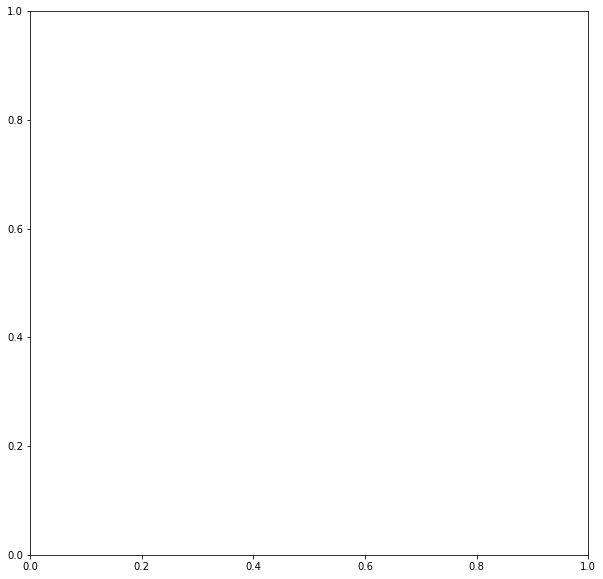

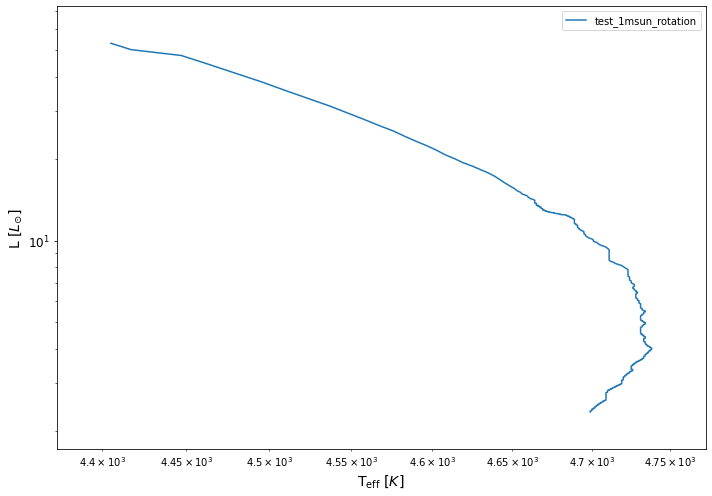

In [16]:
plot(T_eff, L, log_xaxis=True, log_yaxis=True)

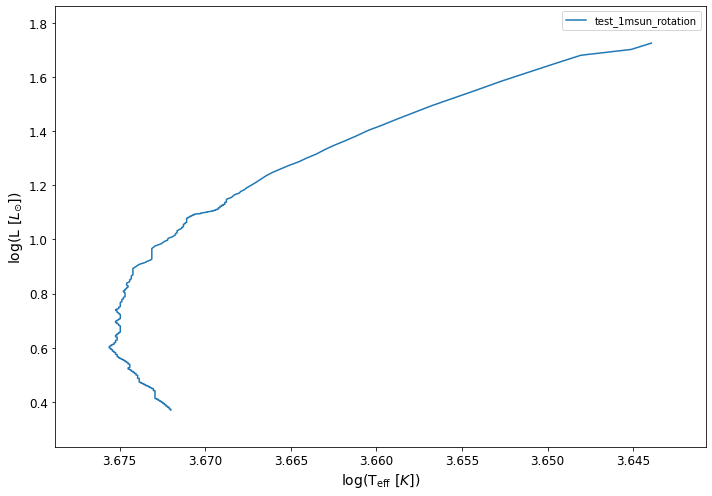

In [17]:
hrd()
